In [ ]:
# Import library yang dibutuhkan
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt
import time, numpy as np, seaborn as sns
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)
"Done"

'Done'

# <center><font color="blue"> Studi Kasus</font></center>

* Sumber Data: https://github.com/arubhasy/dataset/blob/main/heart.csv
* Objective: Merujuk pada keberadaan penyakit jantung pada pasien yang disimbolkan dengan bilangan biner, yaitu 0 = tidak ada penyakit dan 1 = ada penyakit.
* Variable:
 - **Age** – Umur pasien (tahun)
 - **Sex** – Jenis kelamin pasien (M: Male, F: Female)
 - **ChestPainType** – Jenis nyeri dada
    - TA: Typical Angina (nyeri dada terkait mengurangi suplai darah ke jantung)
    - ATA: Atypical Angina (nyeri dada tidak berhubungan dengan jantung)
    - NAP: Non-Anginal Pain (biasanya kejang esofagus (tidak berhubungan dengan jantung))
    - ASY: Asymptomatic (nyeri dada tidak menunjukkan tanda-tanda penyakit)
 - **RestingBP** – Tekanan darah sebelum melakukan aktivitas fisik (mm Hg)
 - **Cholesterol** – kadar kolesterol yang terdapat dalam darah (mm/dl)
 - **FastingBS** – Kadar gula setelah tidak makan dalam jangka waktu tertentu (1: jika FastingBS > 120 mg/dl, 0: lainnya)
 - **RestingECG** – rekaman elektrokardiogram dalam keadaan istirahat
    - Normal:Normal,
    - ST: having ST-T wave abnormality (T
wave inversions and/or ST elevation or
depression of > 0.05 mV) - dapat berkisar dari gejala ringan hingga masalah parah, sinyal detak jantung yang tidak normal
    - LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria (Ruang pompa utama jantung yang diperbesar)
 - **MaxHR** – jumlah denyut jantung maksimal yang dicapai (berkisar antara 60 dan 202)
 - **ExerciseAngina** – nyeri dada yang muncul ketika melakukan aktivitas fisik tertentu (Y: Yes, N: No)
 - **Oldpeak** – Depresi ST yang disebabkan oleh olahraga relatif terhadap istirahat (melihat stres jantung saat berolahraga, jantung yang tidak sehat akan lebih stres)
 - **ST_Slope** – kemiringan segmen ST latihan puncak
    - Up: upsloping (detak jantung yang lebih baik dengan olahraga (tidak biasa))
    - Flat: flat (perubahan minimal (jantung sehat yang khas))
    - Down: downsloping (tanda-tanda jantung yang tidak sehat)
 - **HartDisease** – output class (1: heart disease, 0: Normal)

**1. Mengumpulkan Data**

In [ ]:
# Load data
url = 'https://raw.githubusercontent.com/arubhasy/dataset/main/heart.csv'
heart = pd.read_csv(url)

In [ ]:
# Menampilkan data
N, P = heart.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
print("Tipe Variabe df = ", type(heart))
heart

baris =  918 , Kolom (jumlah variabel) =  12
Tipe Variabe df =  <class 'pandas.core.frame.DataFrame'>


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68.0,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57.0,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57.0,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


**2. Menelaah data**

In [ ]:
# Menampilkan tipe data
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             911 non-null    float64
 1   Sex             908 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


In [ ]:
heart.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.210568,-0.062391,0.127287,-0.300843,0.196534,0.212565
RestingBP,0.210568,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.062391,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.127287,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.300843,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.196534,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.212565,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


Dapat dilihat, korelasi variabel Cholesterol dan MaxHR bernilai negatif terhadap variabel objek (HeartDisease), hal ini berarti hubungannya berbanding terbalik. Sehingga, kedua variabel tersebut dapat dabaikan untuk analisis selanjutnya (akan dilakukan drop column pada tahap membersihkan data).

In [ ]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,911.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,54.102086,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,12.988393,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,177.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Tabel ini menyediakan **statistika deskriptif** tiap tiap variabel pada heart dataset, baik itu numerik maupun kategorik.

Dengan melihat nilai count yang berbeda pada variabel Age dan Sex, dapat diduga bahwa data pada variabel tersebut mengandung **missing value**. Penanganan missing value akan dibahas pada bagian selanjutnya, bersamaan dengan penanganan **noise** yang diduga terdapat pada variabel Age, RestingBP dan Cholestrol yang terdapat nilai 0 didalamnya.

Selain itu, diketahui bahwa **ukuran pemusatan data** untuk variabel kategorik yaitu unique, top dan freq. Sehingga, untuk variabel numerik akan menghasilkan nilai NaN.

**3. Memvalidasi Data**

In [ ]:
# Menampilkan variabel numerik
numVar_heart = heart.select_dtypes(include = ['float64', 'int64'])
numVar_heart.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,NaN,140,289,0,172,0.0,0
1,49.0,160,180,0,156,1.0,1
2,37.0,130,283,0,98,0.0,0
3,48.0,138,214,0,108,1.5,1
4,54.0,150,195,0,122,0.0,0


In [ ]:
# Menampilkan tipe data object untuk diubah kedalam bentuk category
varObjects_heart = heart.select_dtypes(include = ['object'])
varObjects_heart.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [ ]:
# Mengubah tipe data object ke bentuk category agar lebih powerfull
for col in varObjects_heart.columns:
    heart[col] = heart[col].astype('category')
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             911 non-null    float64 
 1   Sex             908 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    int64   
dtypes: category(5), float64(2), int64(5)
memory usage: 55.5 KB


**4. Menentukan Objek Data**

In [ ]:
!pip install sweetviz

In [ ]:
# Visual Python: Data Analysis > Sweetviz
import sweetviz

                                             |          | [  0%]   00:00 -> (? left)


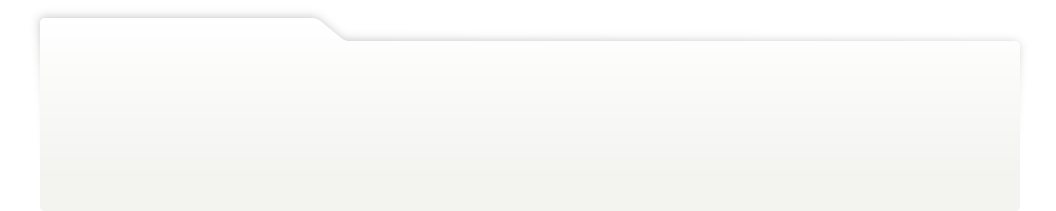
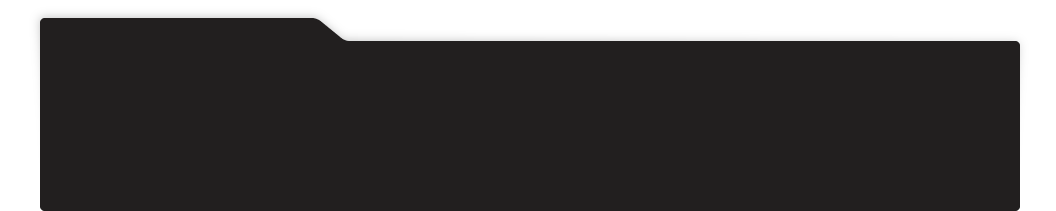
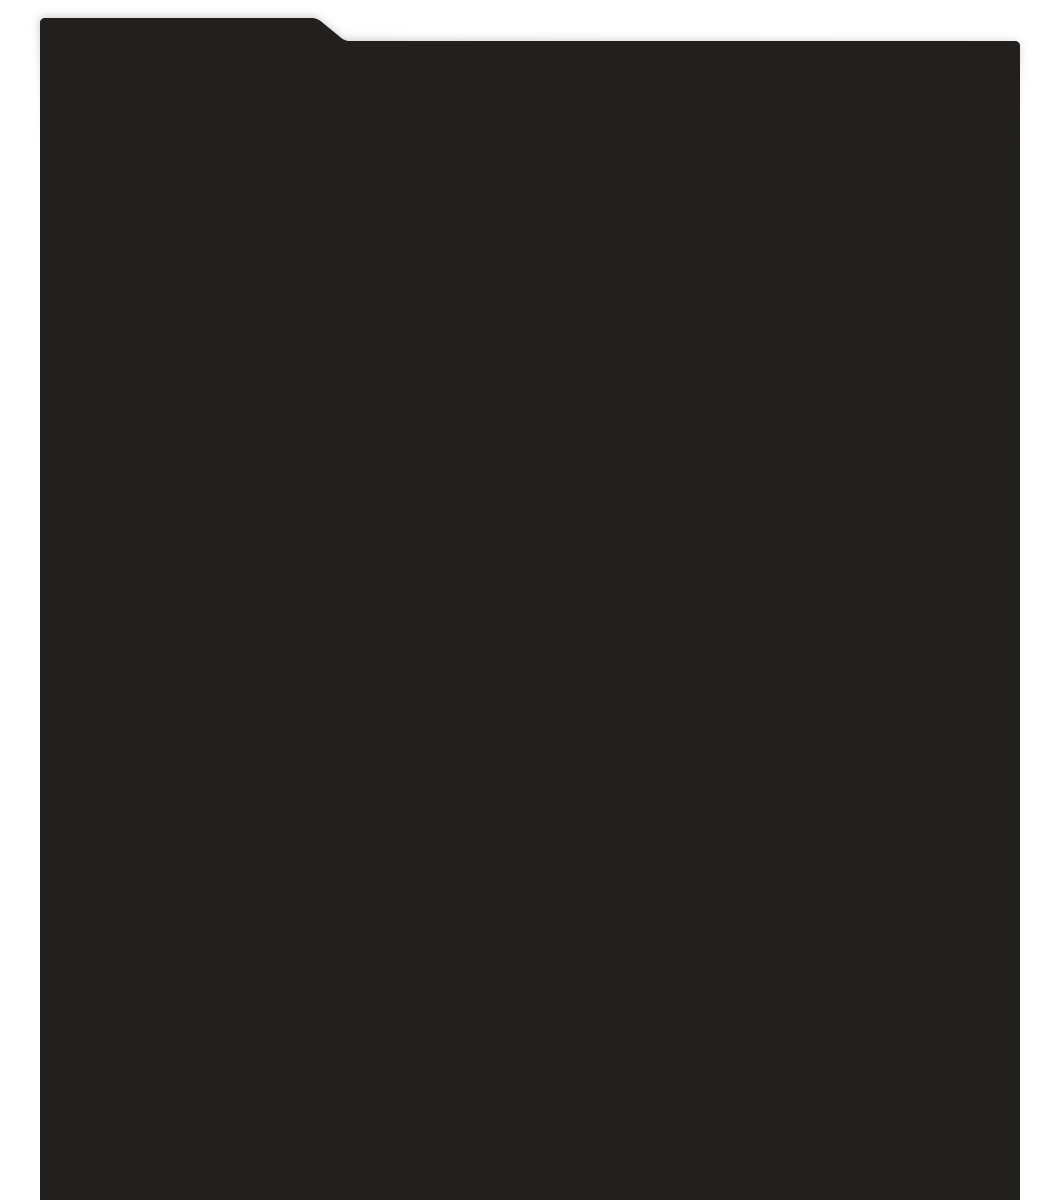
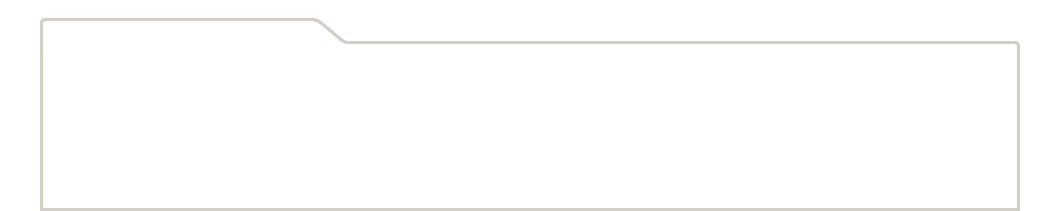
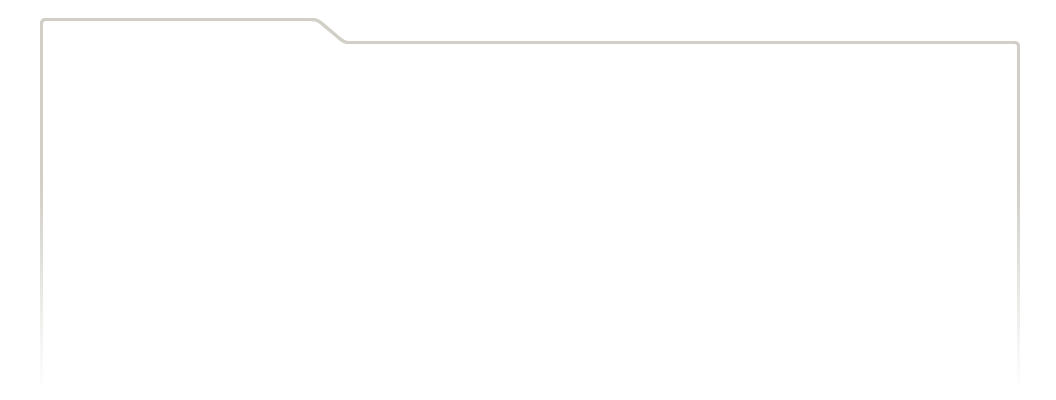
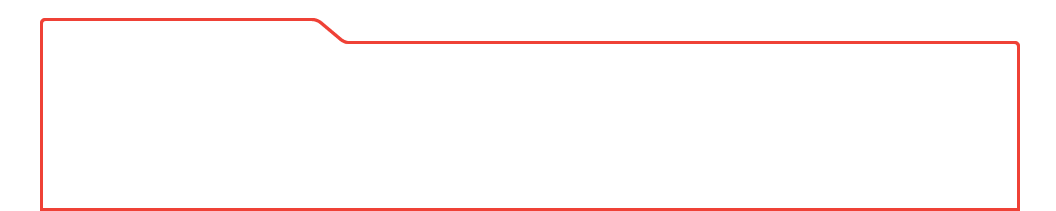
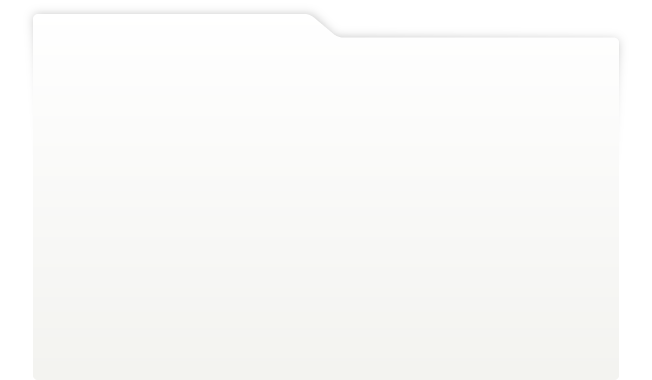
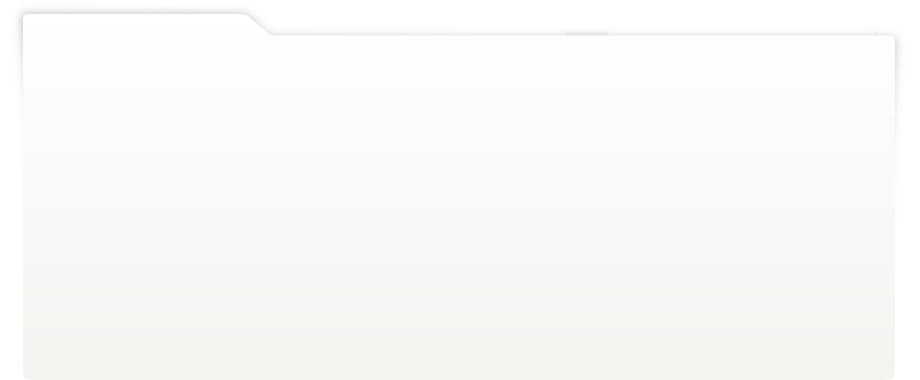
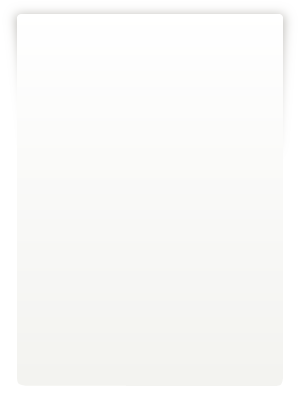
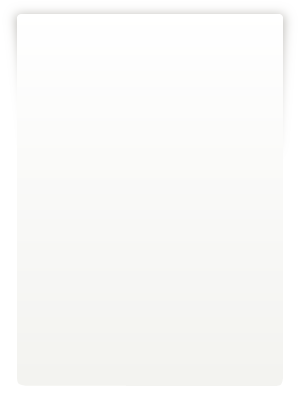
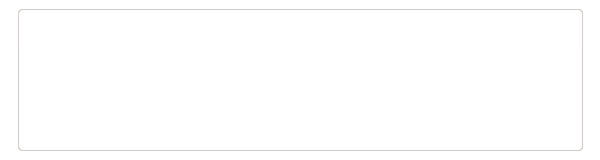
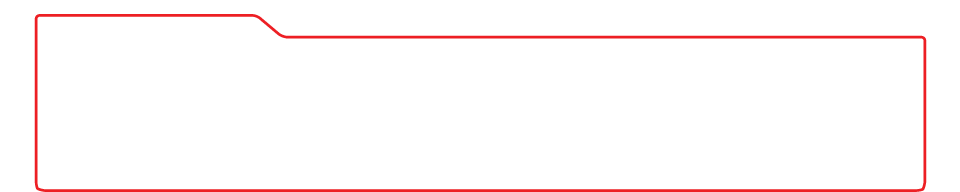
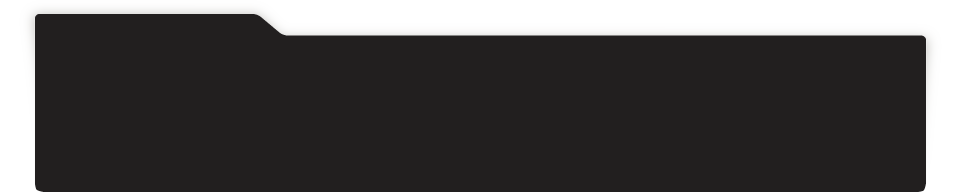
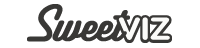
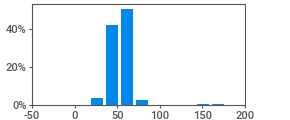
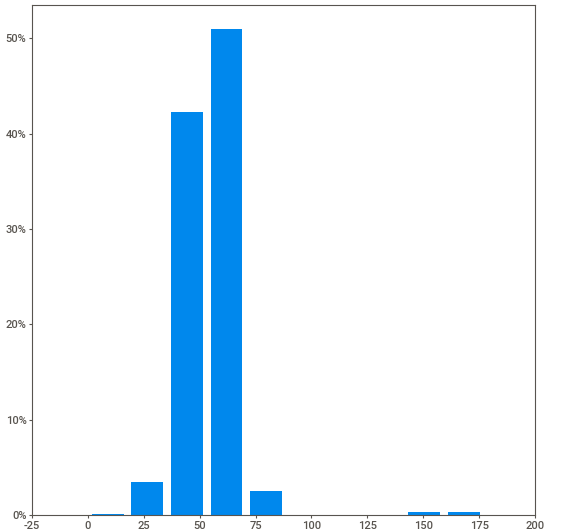
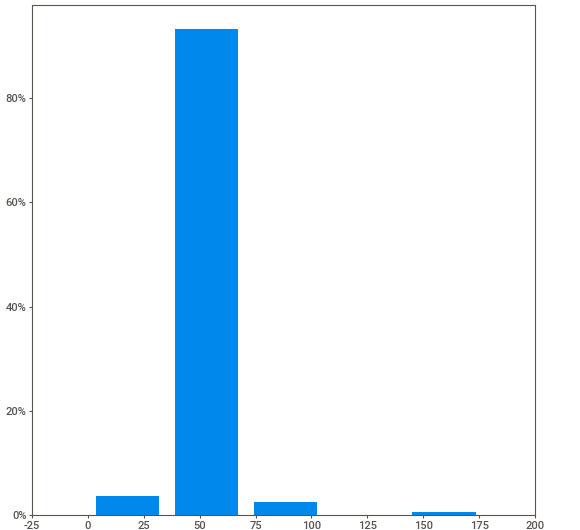
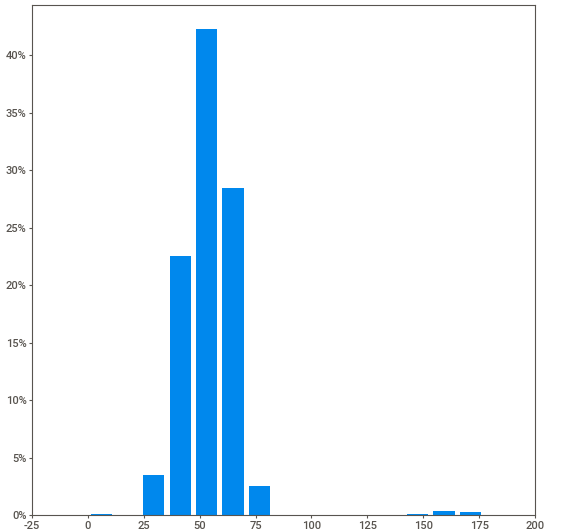
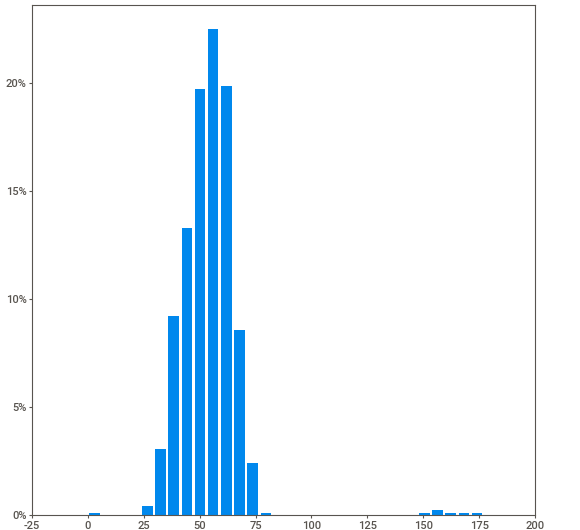
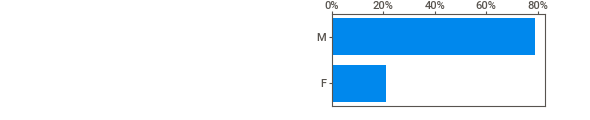
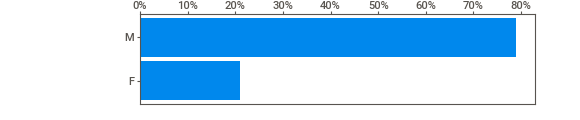
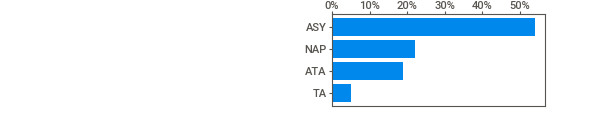
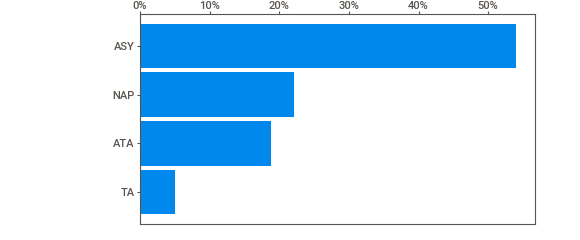
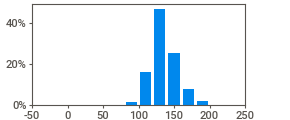
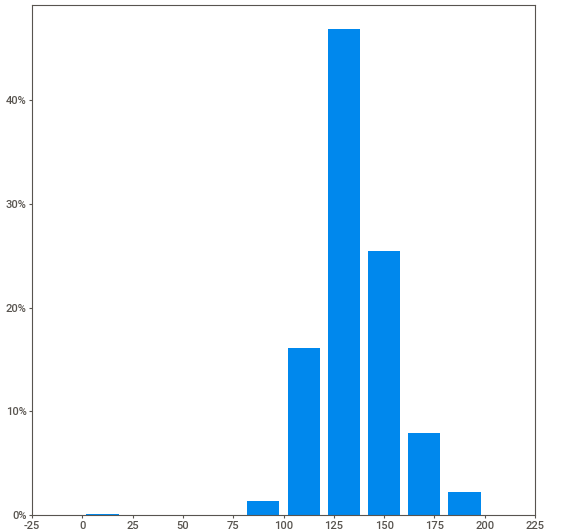
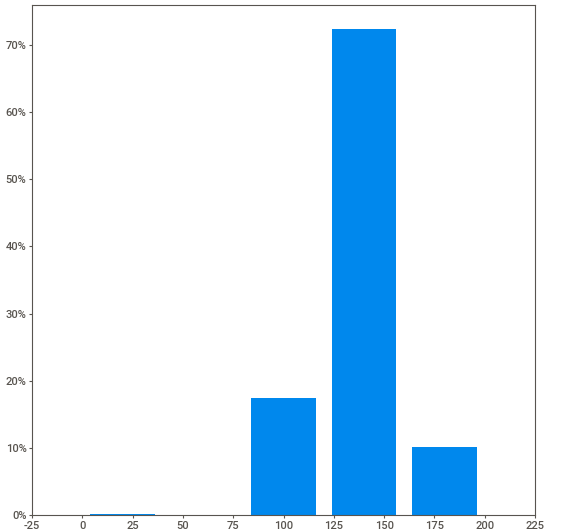
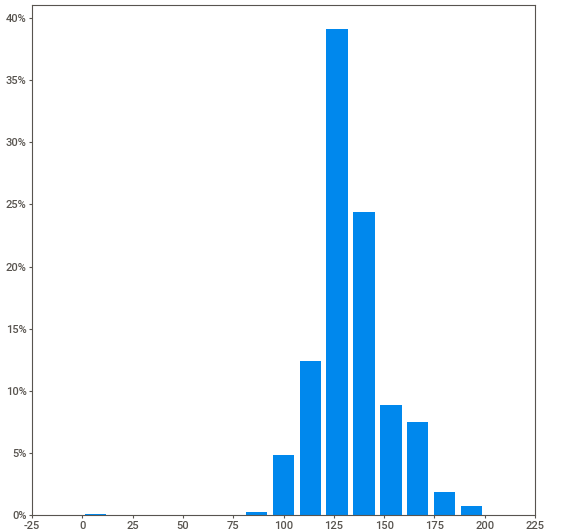
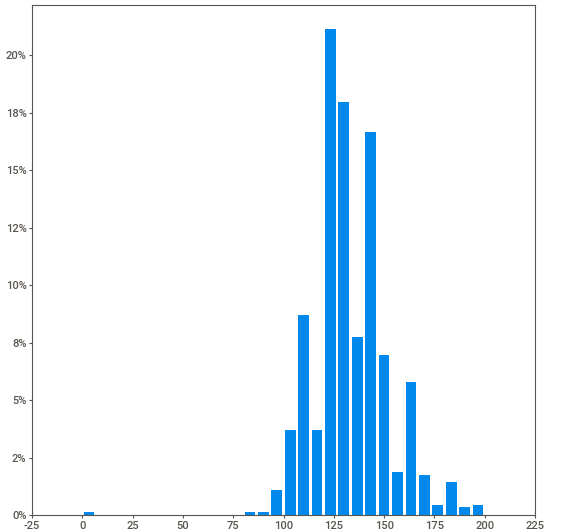
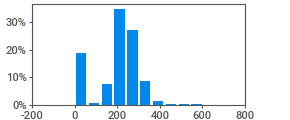
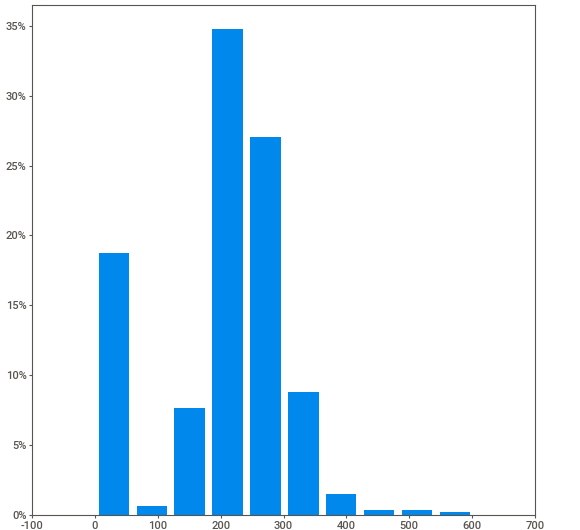
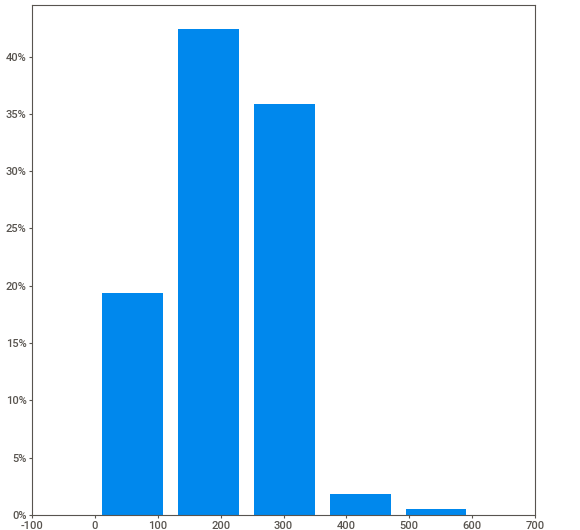
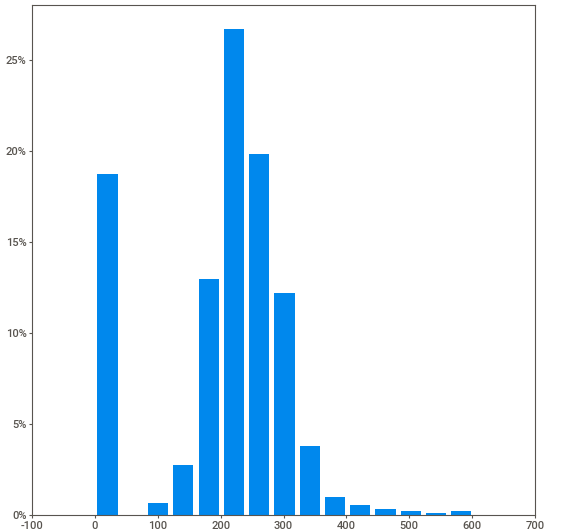
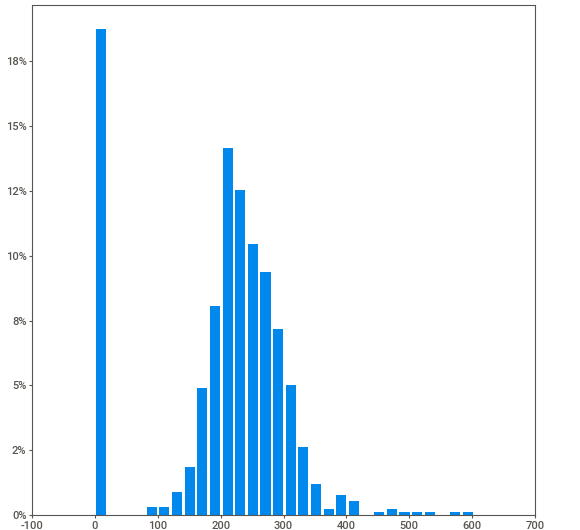
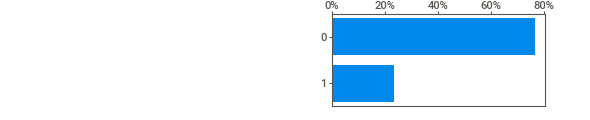
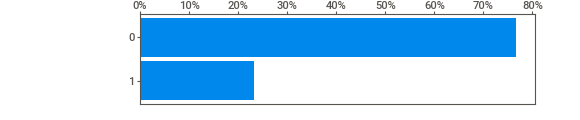
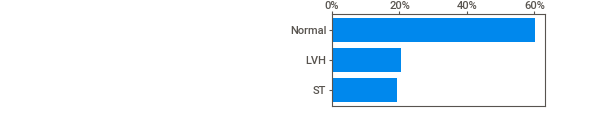
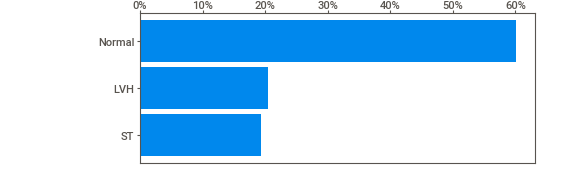
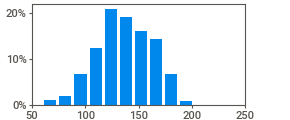
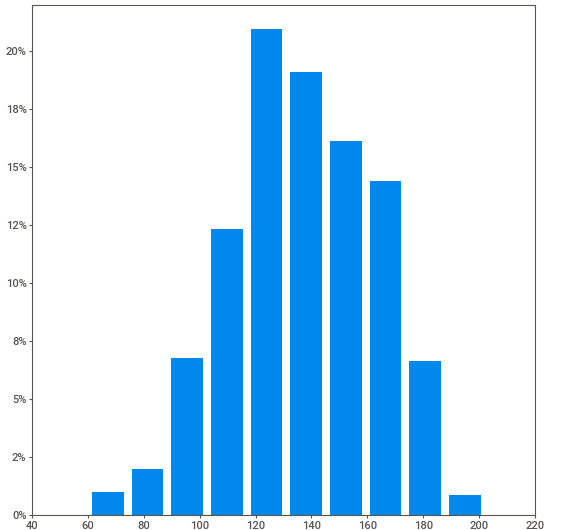
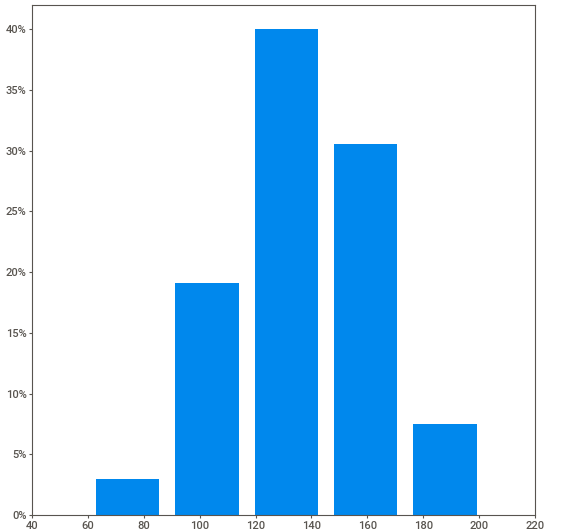
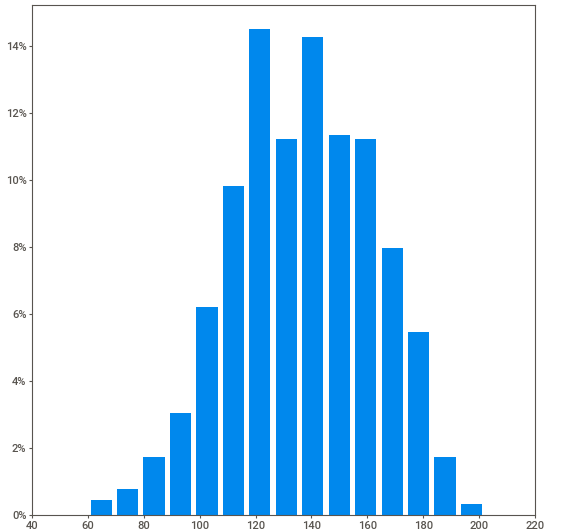
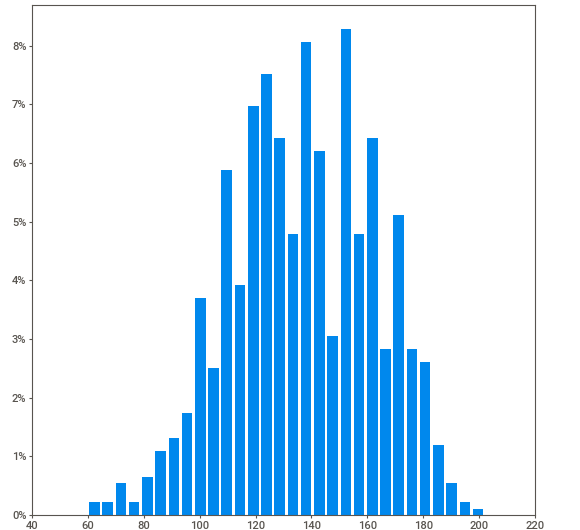
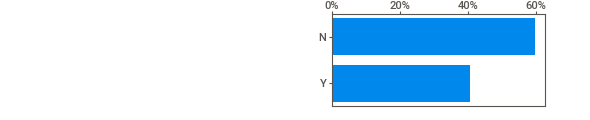
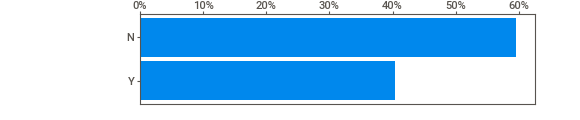
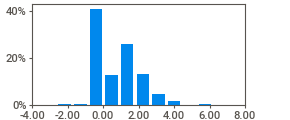
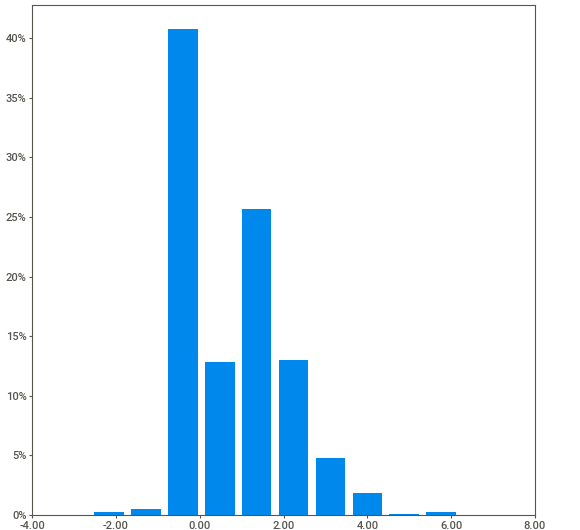
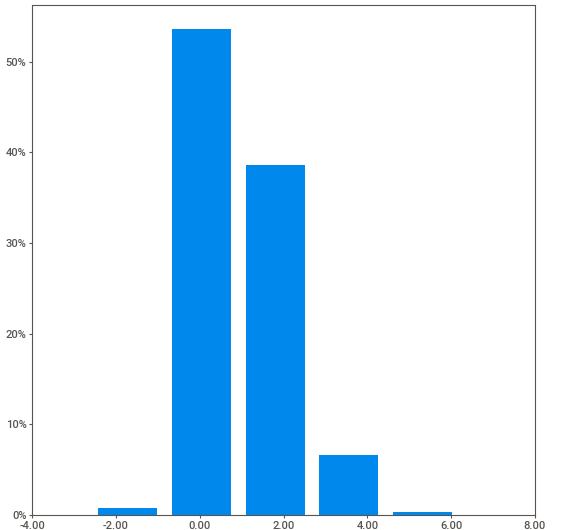
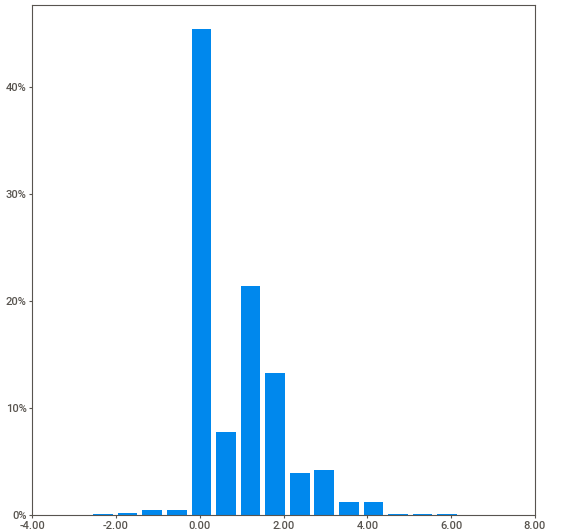
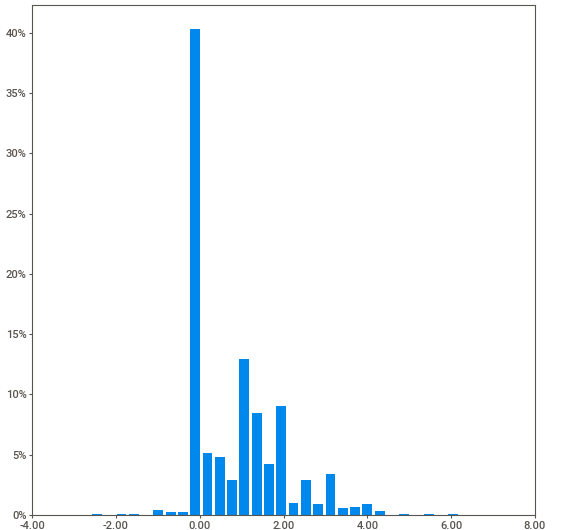
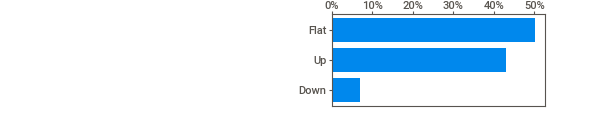
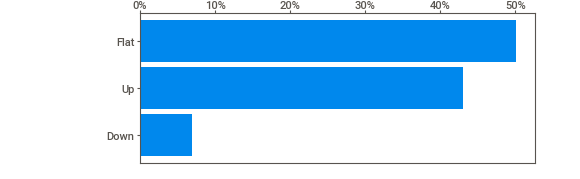
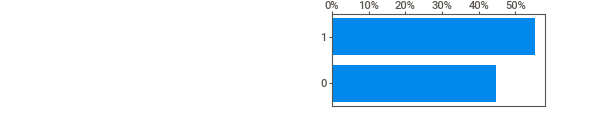
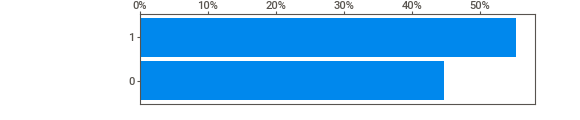
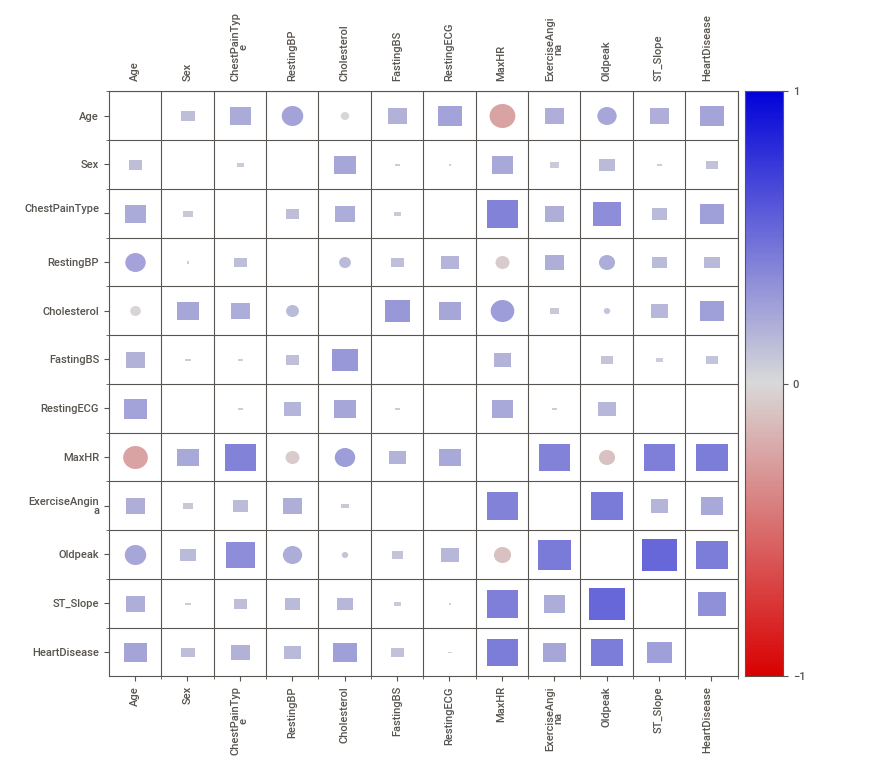
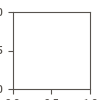

In [ ]:
# Visual Python: Data Analysis > Sweetviz
report = sweetviz.analyze([heart, 'laporan_penelaahan_data_awal'])
report.show_notebook()
report

**5. Membersihkan Data**

In [ ]:
# Menghapus variabel Cholesterol dan MaxHR karena berkorelasi negatif terhadap variabel HeartDisease
try:
    heart.drop(['Cholesterol','MaxHR'], axis=1, inplace=True)
except Exception as err_:
    print(err_)

print(heart.columns)
heart.head(3)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'FastingBS', 'RestingECG',
       'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease'],
      dtype='object')


,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,0,Normal,N,0.0,Up,0
1,49.0,F,NAP,160,0,Normal,N,1.0,Flat,1
2,37.0,M,ATA,130,0,ST,N,0.0,Up,0


In [ ]:
# Cek noise var kategorik dengan melihat nilai uniknya
catVar_heart = heart.select_dtypes(include = ['object', 'category'])
for col in catVar_heart.columns:
    print(col,': ', set(heart[col].unique()))

Sex :  {'F', nan, 'M'}
ChestPainType :  {'ATA', 'NAP', 'TA', 'ASY'}
RestingECG :  {'LVH', 'Normal', 'ST'}
ExerciseAngina :  {'N', 'Y'}
ST_Slope :  {'Flat', 'Down', 'Up'}


Terlihat variabel Sex mengandung nilai nan, hal ini disebut missing value, penanganannya akan dibahas selanjutnya.

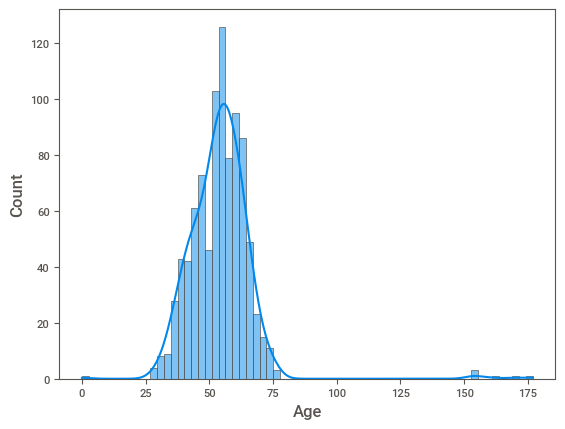

,Age
count,911.000000
mean,54.102086
std,12.988393
min,0.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,177.000000


In [ ]:
# Cek noise var numerik dengan melihat sebaran data melalui histiogram
# Visual Python: Visualization > Seaborn
sns.histplot(data=heart, x='Age', kde=True)
plt.show()
heart[['Age']].describe()

Karena terdapat outlier bernilai 0, dimana nilai tersebut tidak mungkin mewakili umur seseorang, maka akan dilakukan drop

In [ ]:
heart.drop(heart[(heart.Age == 0)].index, inplace=True)

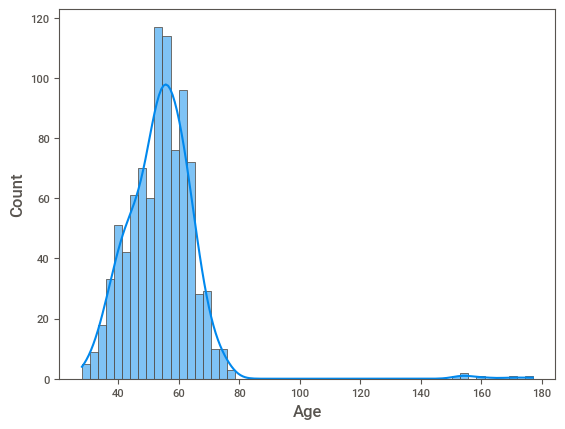

,Age
count,910.000000
mean,54.161538
std,12.870911
min,28.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,177.000000


In [ ]:
# Visual Python: Visualization > Seaborn
sns.histplot(data=heart, x='Age', kde=True)
plt.show()
heart[['Age']].describe()

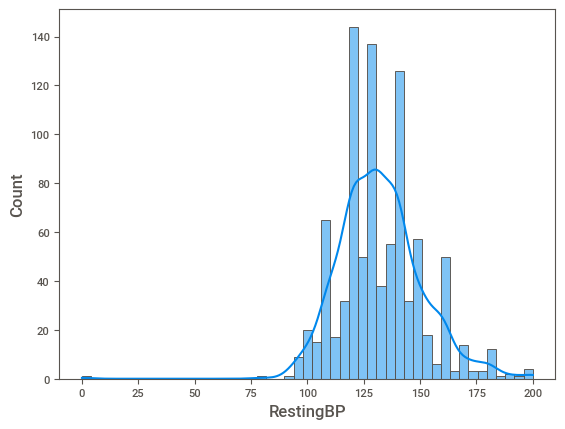

,RestingBP
count,917.000000
mean,132.399128
std,18.524088
min,0.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


In [ ]:
# Visual Python: Visualization > Seaborn
sns.histplot(data=heart, x='RestingBP', kde=True)
plt.show()
heart[['RestingBP']].describe()

Karena terdapat outlier bernilai 0, dimana nilai tersebut tidak mungkin mewakili detak jantung seseorang, maka akan dilakukan drop

In [ ]:
heart.drop(heart[(heart.RestingBP == 0)].index, inplace=True)

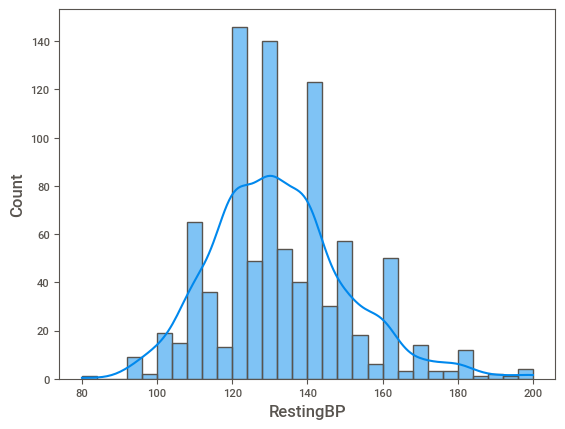

,RestingBP
count,916.000000
mean,132.543668
std,18.009386
min,80.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


In [ ]:
# Cek noise var numerik dengan melihat sebaran data melalui histiogram
# Visual Python: Visualization > Seaborn
sns.histplot(data=heart, x='RestingBP', kde=True)
plt.show()
heart[['RestingBP']].describe()

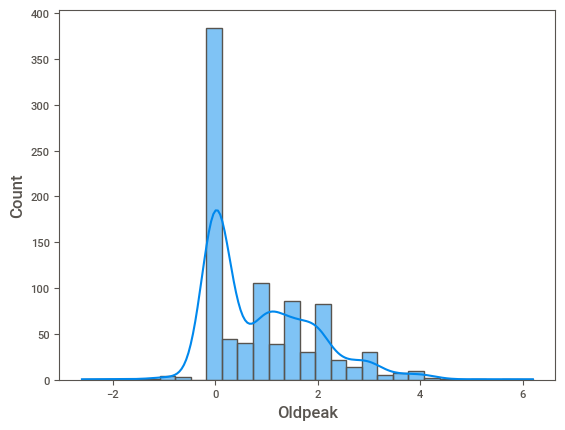

,Oldpeak
count,916.000000
mean,0.886463
std,1.067520
min,-2.600000
25%,0.000000
50%,0.550000
75%,1.500000
max,6.200000


In [ ]:
# Visual Python: Visualization > Seaborn
sns.histplot(data=heart, x='Oldpeak', kde=True)
plt.show()
heart[['Oldpeak']].describe()

In [ ]:
# Visual Python: Visualization > Seaborn
def vp_seaborn_show_values(axs, precision=1, space=0.01):
    pstr = '{:.' + str(precision) + 'f}'

    def _single(ax):
        # check orient
        orient = 'v'
        if len(ax.patches) == 1:
            # check if 0
            if ax.patches[0].get_x() == 0:
                orient = 'h'
        else:
            # compare 0, 1 patches
            p0 = ax.patches[0]
            p1 = ax.patches[1]
            if p0.get_x() == p1.get_x():
                orient = 'h'

        if orient == 'v':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*space)
                if not np.isnan(_x) and not np.isnan(_y):
                    value = pstr.format(p.get_height())
                    ax.text(_x, _y, value, ha='center')
        elif orient == 'h':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + (space - 0.01)
                _y = p.get_y() + p.get_height() / 2
                if not np.isnan(_x) and not np.isnan(_y):
                    value = pstr.format(p.get_width())
                    ax.text(_x, _y, value, ha='left')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

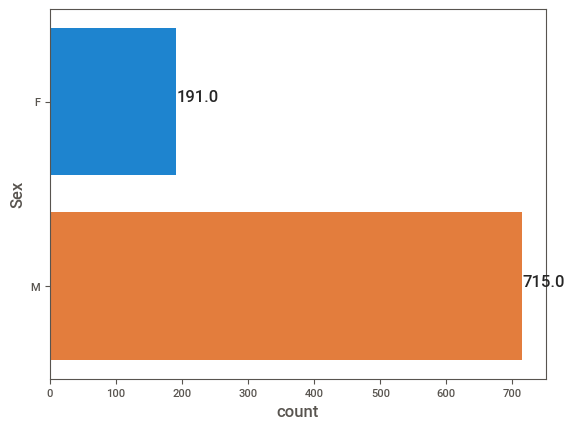

In [ ]:
# Memeriksa outlier pada variabel kategorik
# Visual Python: Visualization > Seaborn
ax = sns.countplot(data=heart, y='Sex')
vp_seaborn_show_values(ax)
plt.show()

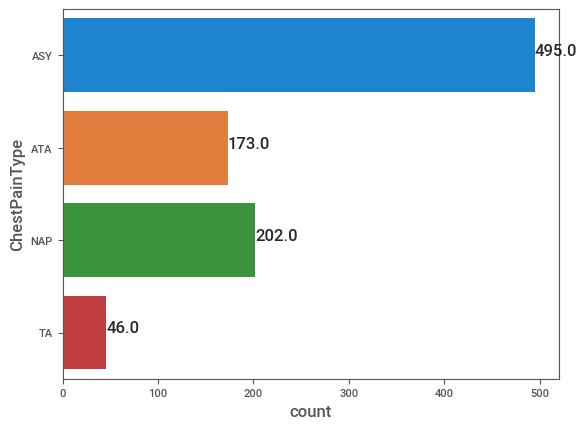

In [ ]:
# Visual Python: Visualization > Seaborn
ax = sns.countplot(data=heart, y='ChestPainType')
vp_seaborn_show_values(ax)
plt.show()

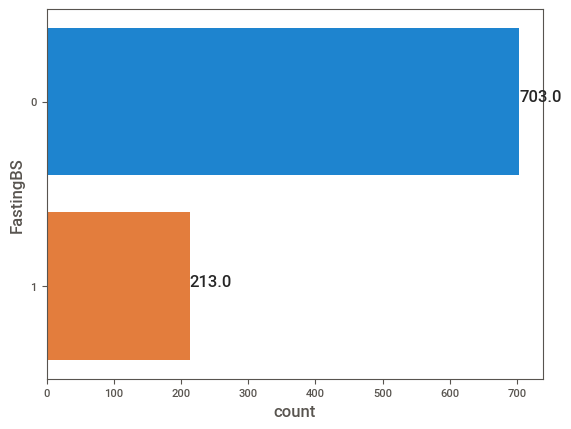

In [ ]:
# Visual Python: Visualization > Seaborn
ax = sns.countplot(data=heart, y='FastingBS')
vp_seaborn_show_values(ax)
plt.show()

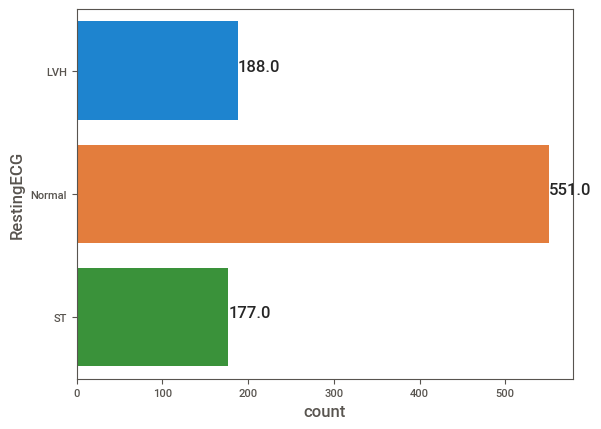

In [ ]:
# Visual Python: Visualization > Seaborn
ax = sns.countplot(data=heart, y='RestingECG')
vp_seaborn_show_values(ax)
plt.show()

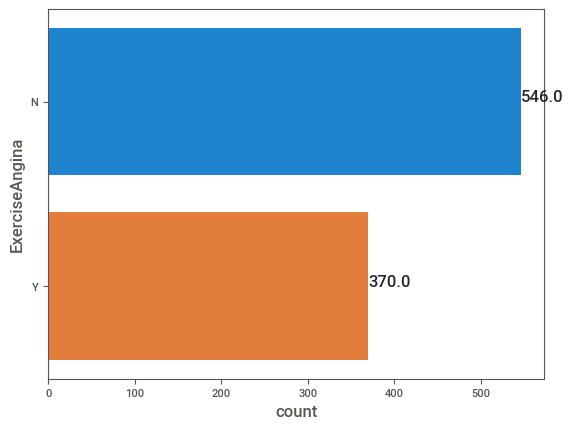

In [ ]:
# Visual Python: Visualization > Seaborn
ax = sns.countplot(data=heart, y='ExerciseAngina')
vp_seaborn_show_values(ax)
plt.show()

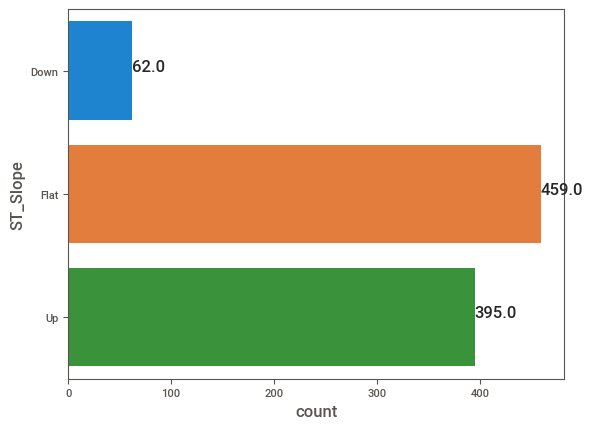

In [ ]:
# Visual Python: Visualization > Seaborn
ax = sns.countplot(data=heart, y='ST_Slope')
vp_seaborn_show_values(ax)
plt.show()

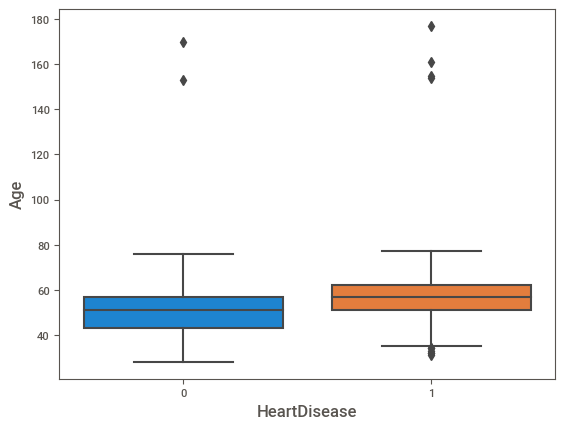

In [ ]:
# Memeriksa outlier pada variabel Numerik terhadap variabel HeartDisease
# Visual Python: Visualization > Seaborn
sns.boxplot(data=heart, x='HeartDisease', y='Age')
plt.show()

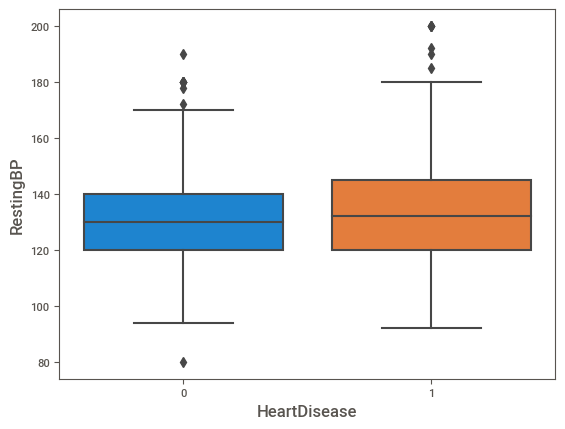

In [ ]:
# Visual Python: Visualization > Seaborn
sns.boxplot(data=heart, x='HeartDisease', y='RestingBP')
plt.show()

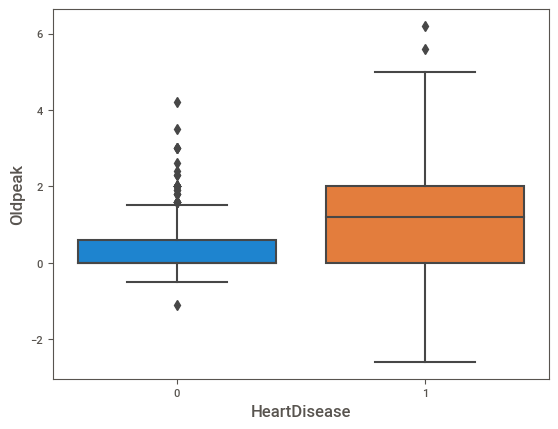

In [ ]:
# Visual Python: Visualization > Seaborn
sns.boxplot(data=heart, x='HeartDisease', y='Oldpeak')
plt.show()

Terdapat outlier pada setiap variabel numerik dan kategorik, akan tetapi outlier ini tidak bisa sembarang dihapus, perlu dilakukan crosscheck karena bisa saja outlier ini mengandung insight yang bermanfaat.

Dalam kasus ini, akan digunakan model Decission Tree yang robas terhadap outlier, yang selanjutnya akan dibandingkan dengan model Regresi Logistik.

In [ ]:
# Memeriksa duplikasi data
print(heart.shape)
print("jumlah data yang duplikat", heart.duplicated().sum())
heart[heart.duplicated() == True].head()

(916, 10)
jumlah data yang duplikat 11


,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
125,54.0,M,ATA,120,0,Normal,N,0.0,Up,0
163,42.0,M,ATA,120,0,Normal,N,0.0,Up,0
182,52.0,M,ASY,140,0,Normal,Y,2.0,Flat,1
186,58.0,M,ATA,130,0,Normal,N,0.0,Up,0
231,40.0,M,NAP,130,0,Normal,N,0.0,Up,0


Tida ada data yang duplikat

In [ ]:
# Memeriksa missing value
print(heart.isnull().sum())

Age                7
Sex               10
ChestPainType      0
RestingBP          0
FastingBS          0
RestingECG         0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease       0
dtype: int64


In [ ]:
# Melihat persentase missing value
(heart.isnull().sum()/len([heart])*0.01).to_frame('persentase missing')

,persentase missing
Age,0.07
Sex,0.10
ChestPainType,0.00
RestingBP,0.00
FastingBS,0.00
RestingECG,0.00
ExerciseAngina,0.00
Oldpeak,0.00
ST_Slope,0.00
HeartDisease,0.00


Melanjutkan pembahasan sebelumnya, terdapat missing value pada variabel Age dan Sex.

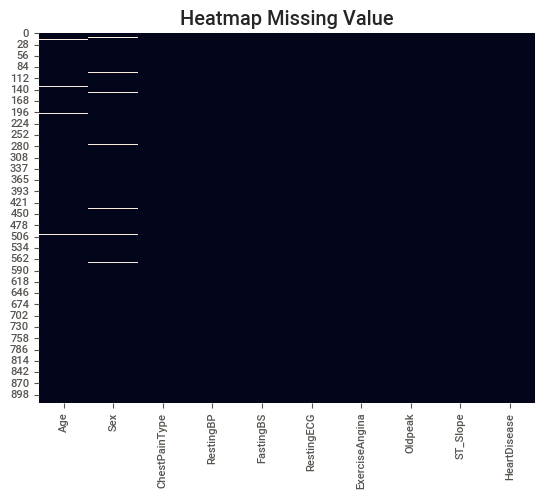

In [ ]:
# Melihat persebaran missing value
sns.heatmap(heart.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

Persebaran missing value terlihat acak.

Selanjutnya, akan diperiksa nilai unik dari variabel tersebut, sehingga dapat diketahui apakah missing value tersebut termasuk noise atau bukan, sehingga dapat disimpulkan penanganan missing value selanjutnya.

In [ ]:
# Cek noise var Umur dengan melihat nilai uniknya
unqVar_Age = heart['Age'].unique()
print(unqVar_Age)

[ nan  49.  37.  48.  54.  39.  45.  58.  42.  38.  43.  60.  36.  44.
  40.  53.  52.  51.  56.  41.  32.  65.  35.  59.  50.  47.  31.  46.
  57. 155.  55.  63.  66.  34.  33.  61.  29.  62.  28.  30.  74.  68.
  72.  64.  69.  67.  73.  70. 161. 177.  75.  76.  71. 153. 170. 154.
  77.]


Dengan melihat nilai unik variabel Sex dan Age, didapat missing value pada variabel tersebut bernilai nan. Dengan mempertimbangkan hal ini, serta persebaran missing value yang acak. Maka, penanganan missing value dapat kita lakukan drop.

In [ ]:
heart1 = heart.dropna()
print(heart1.shape, heart1.shape)
heart1.head()

(900, 10) (900, 10)


,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49.0,F,NAP,160,0,Normal,N,1.0,Flat,1
2,37.0,M,ATA,130,0,ST,N,0.0,Up,0
3,48.0,F,ASY,138,0,Normal,Y,1.5,Flat,1
4,54.0,M,NAP,150,0,Normal,N,0.0,Up,0
5,39.0,M,NAP,120,0,Normal,N,0.0,Up,0


In [ ]:
# Memeriksa missing value
print(heart1.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
FastingBS         0
RestingECG        0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Sudah tidak terdapat missing value pada data

Selanjutnya, akan dibuat laporan penelaahan data menggunakan data yang sudah selesai dilakukan PreProcessing

In [ ]:
# Visual Python: Data Analysis > Sweetviz
!pip install sweetviz

In [ ]:
# Visual Python: Data Analysis > Sweetviz
import sweetviz

                                             |          | [  0%]   00:00 -> (? left)


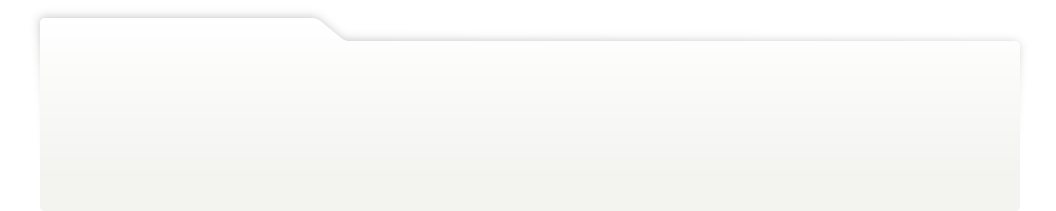
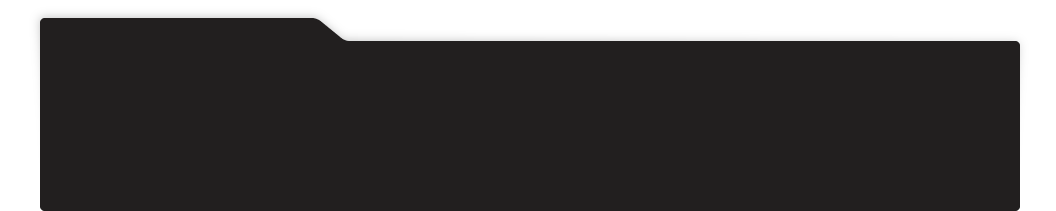
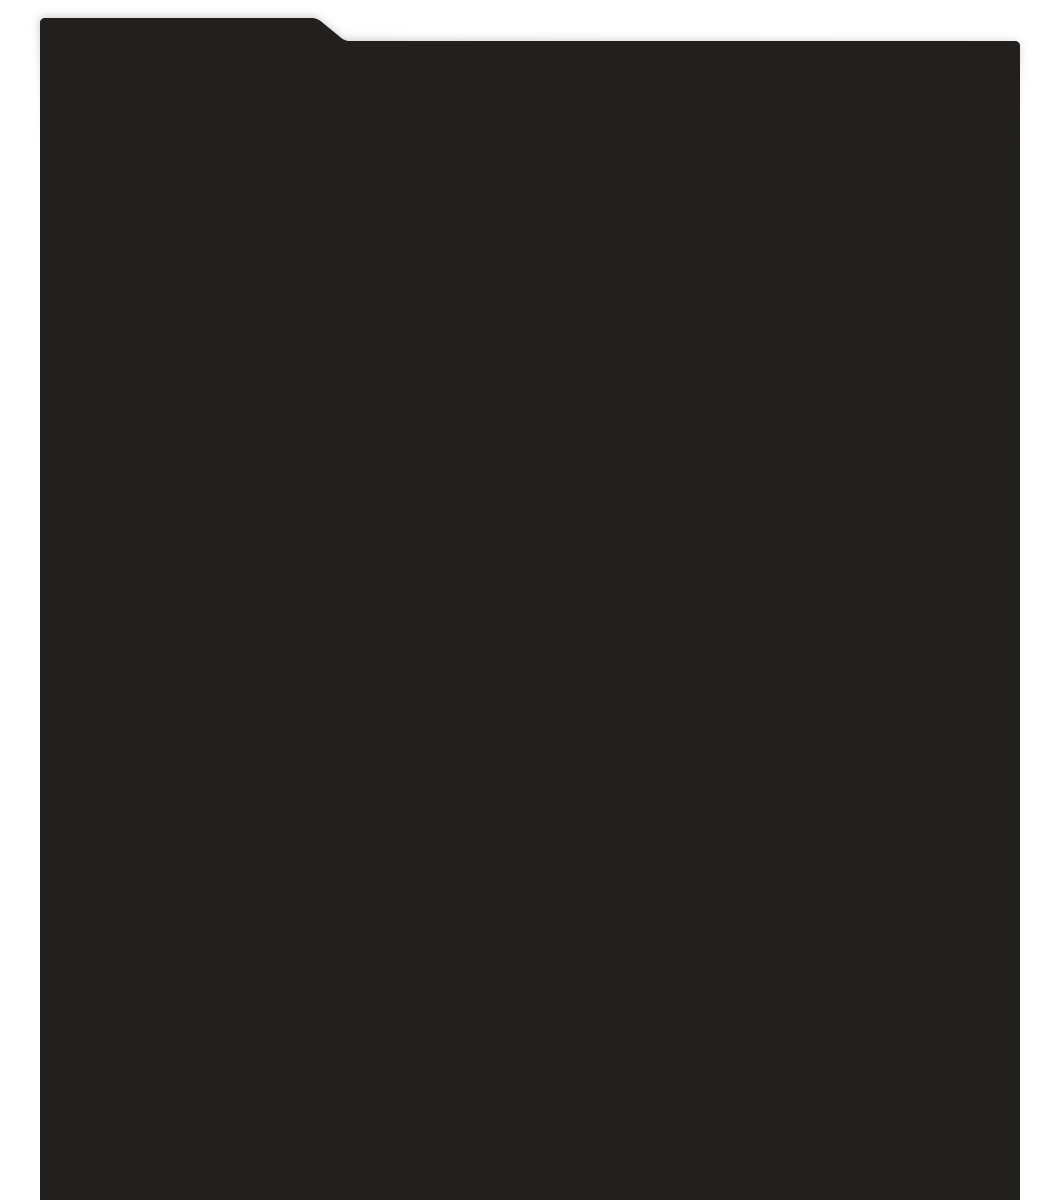
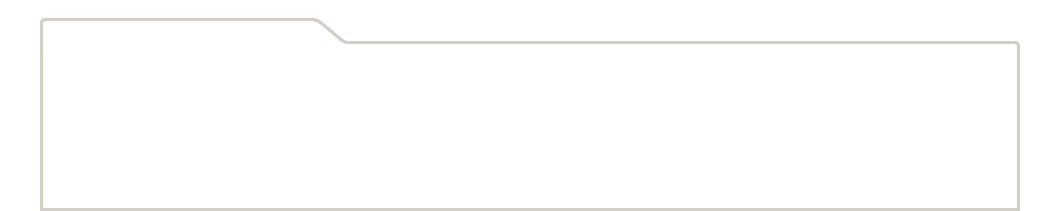
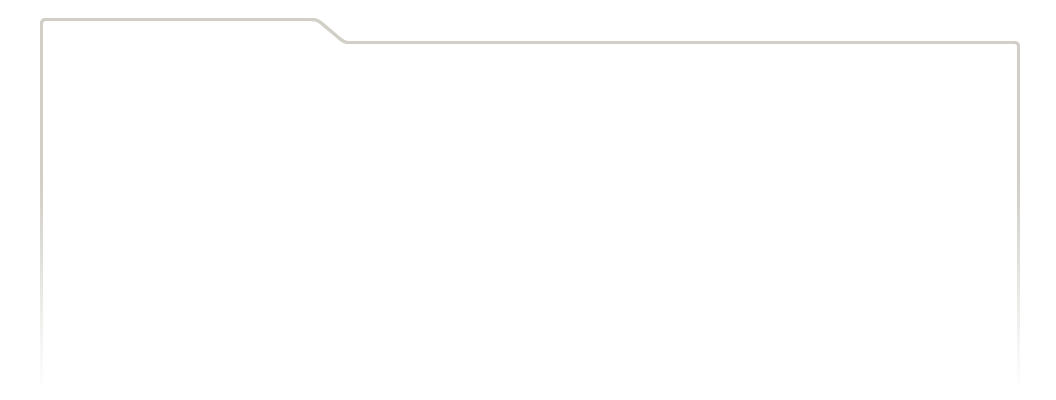
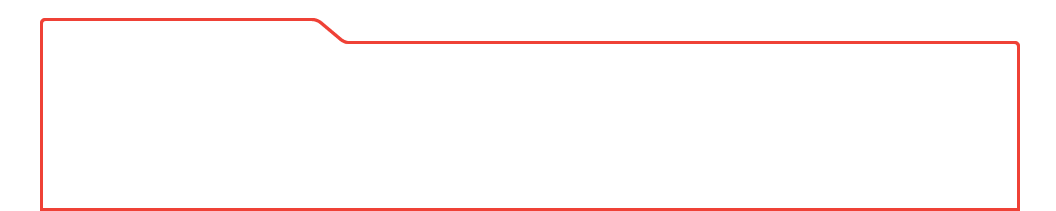
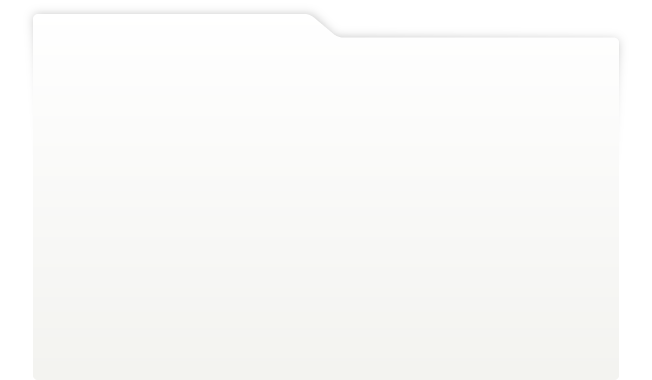
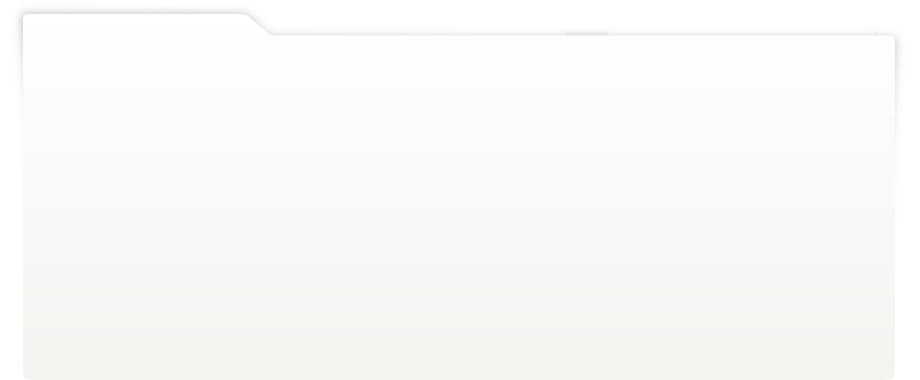
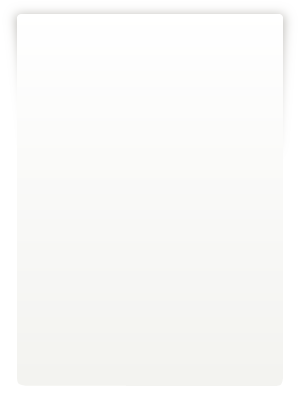
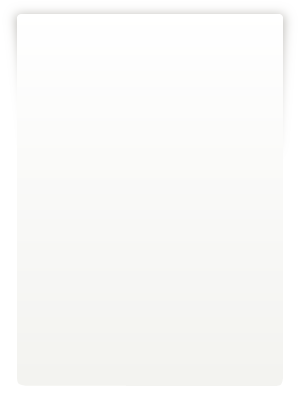
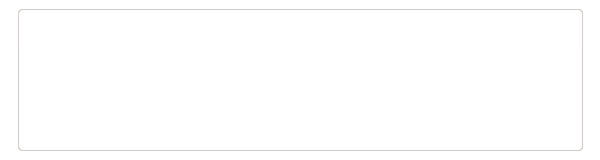
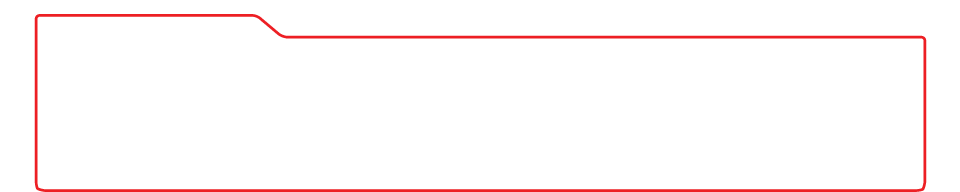
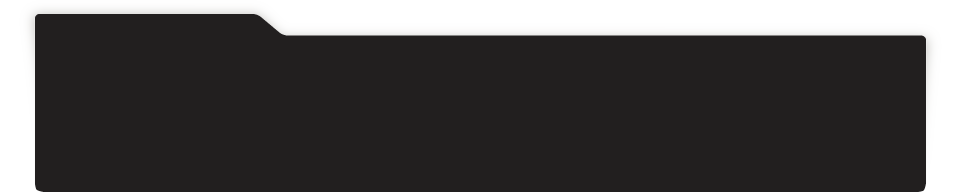
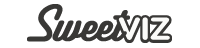
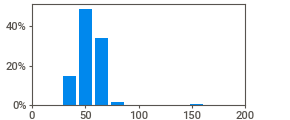
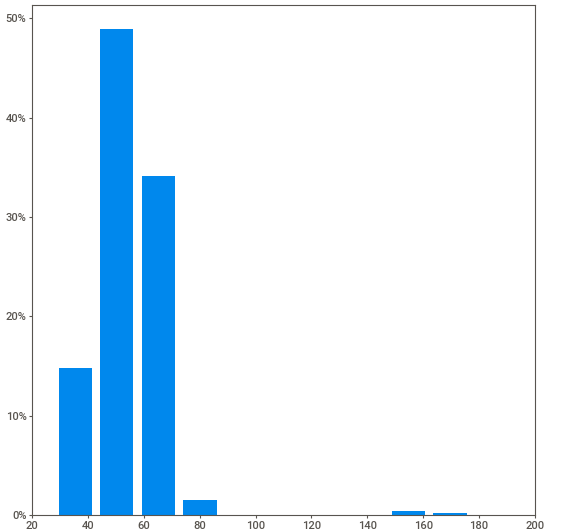
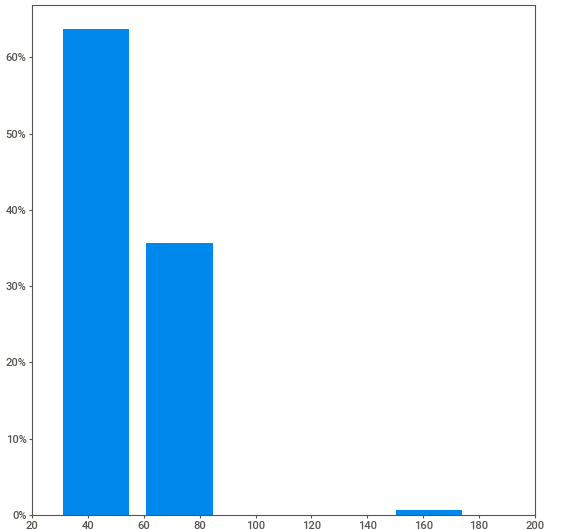
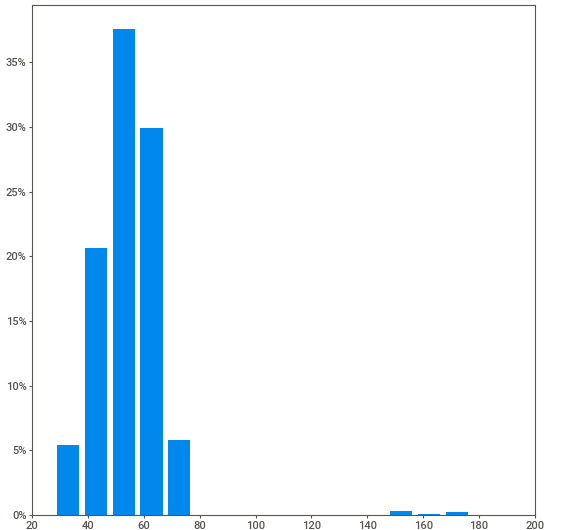
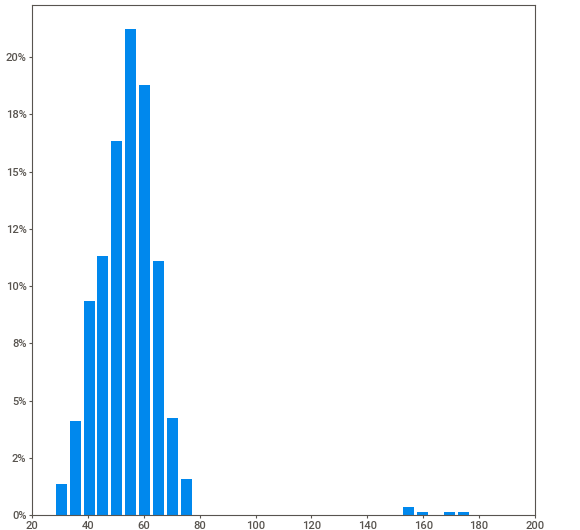
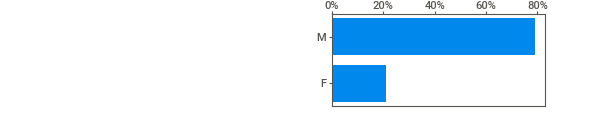
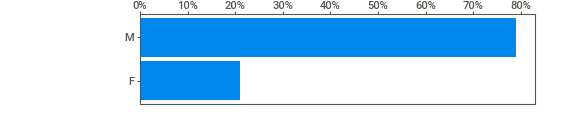
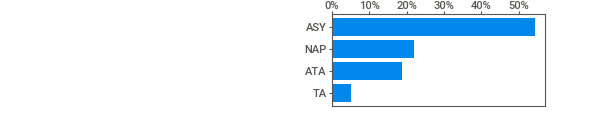
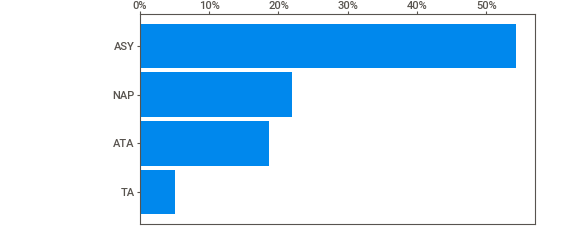
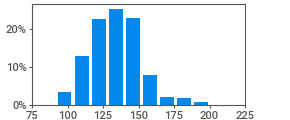
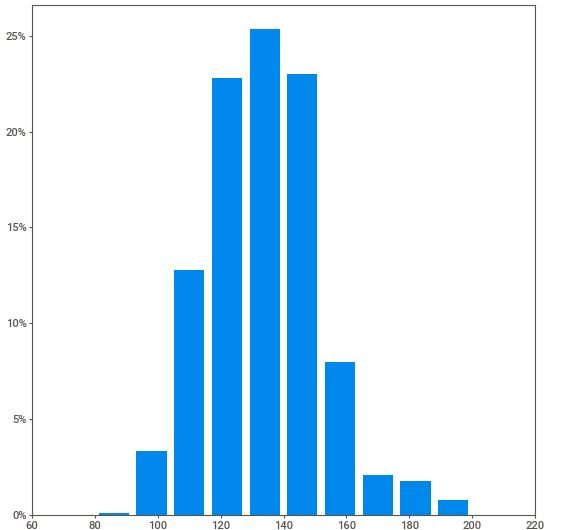
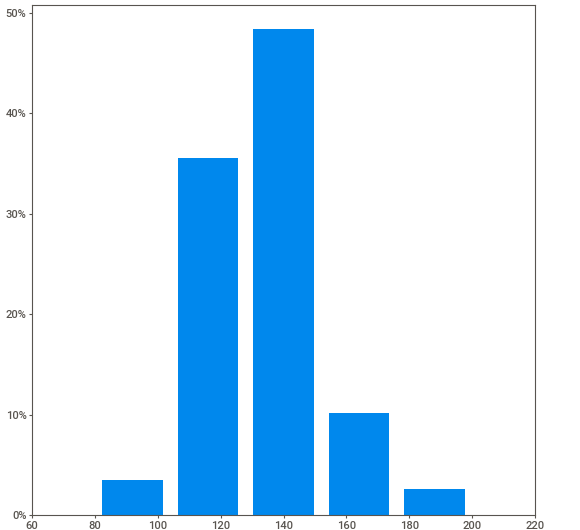
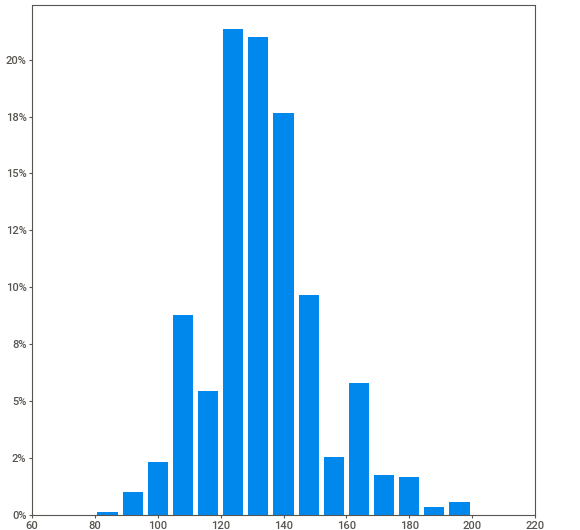
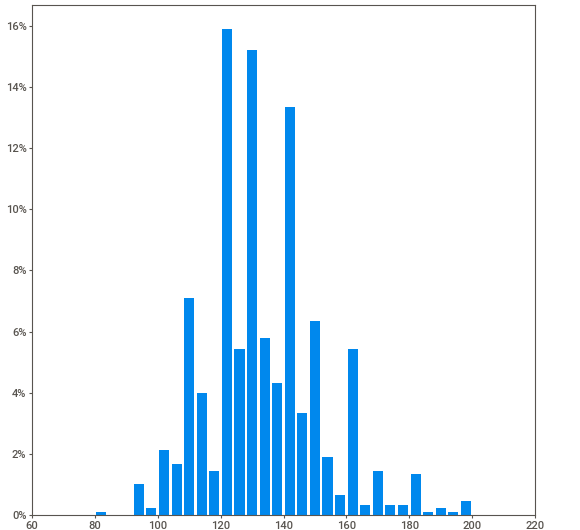
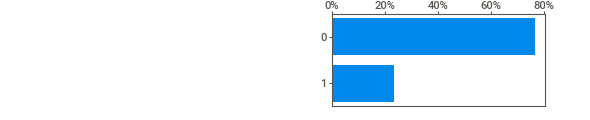
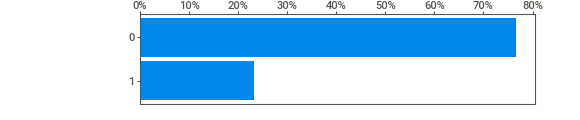
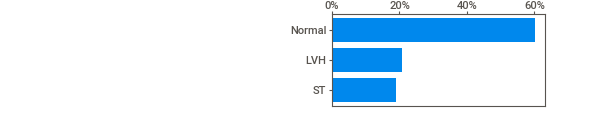
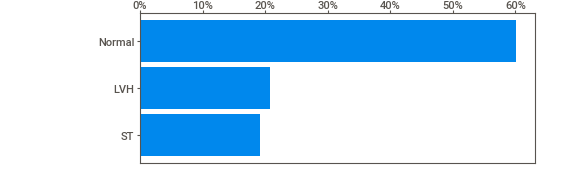
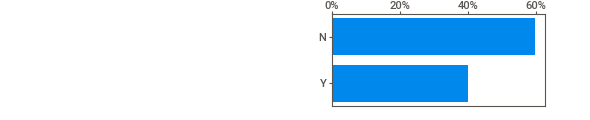
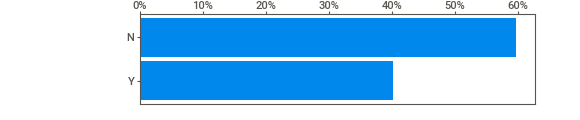
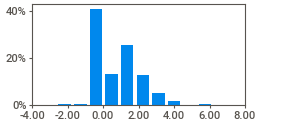
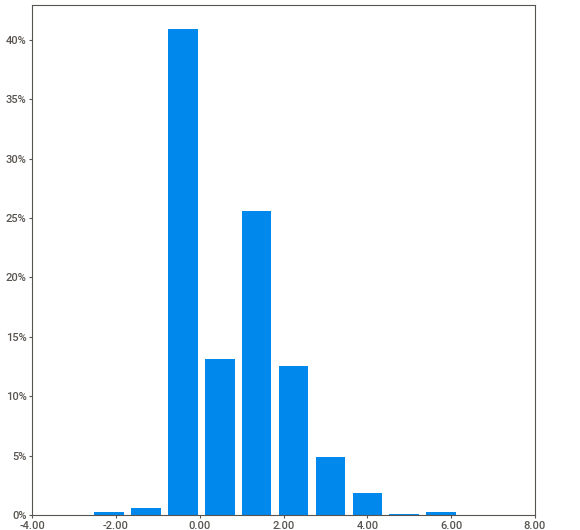
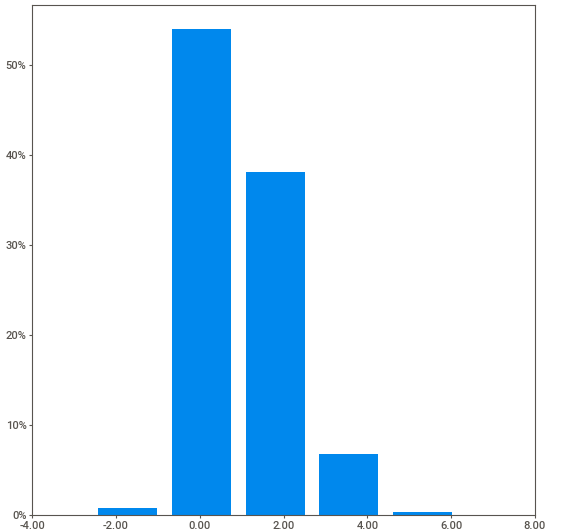
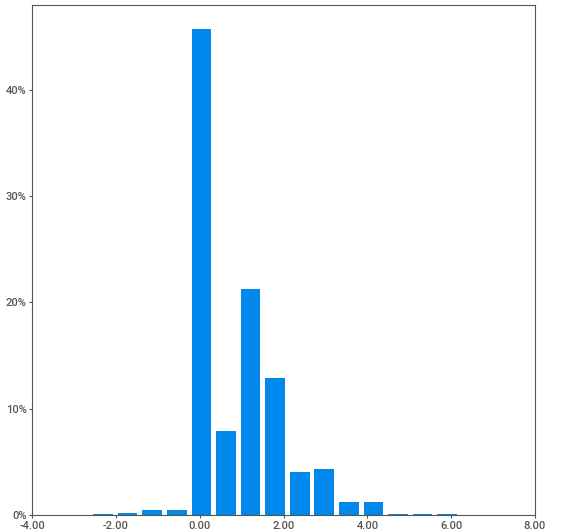
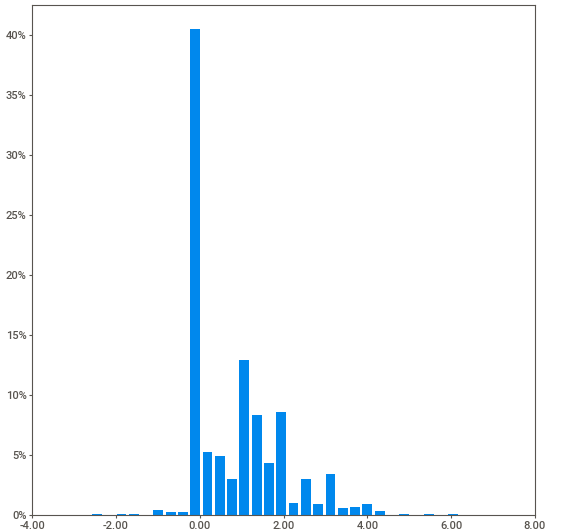
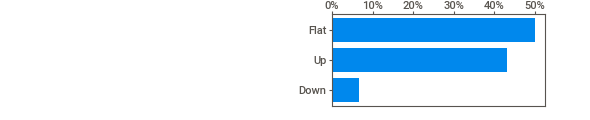
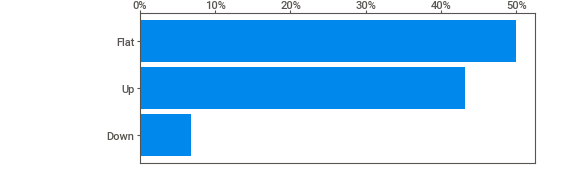
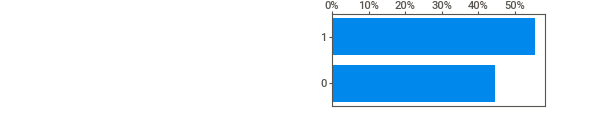
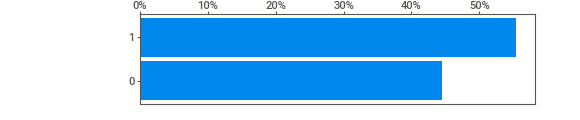
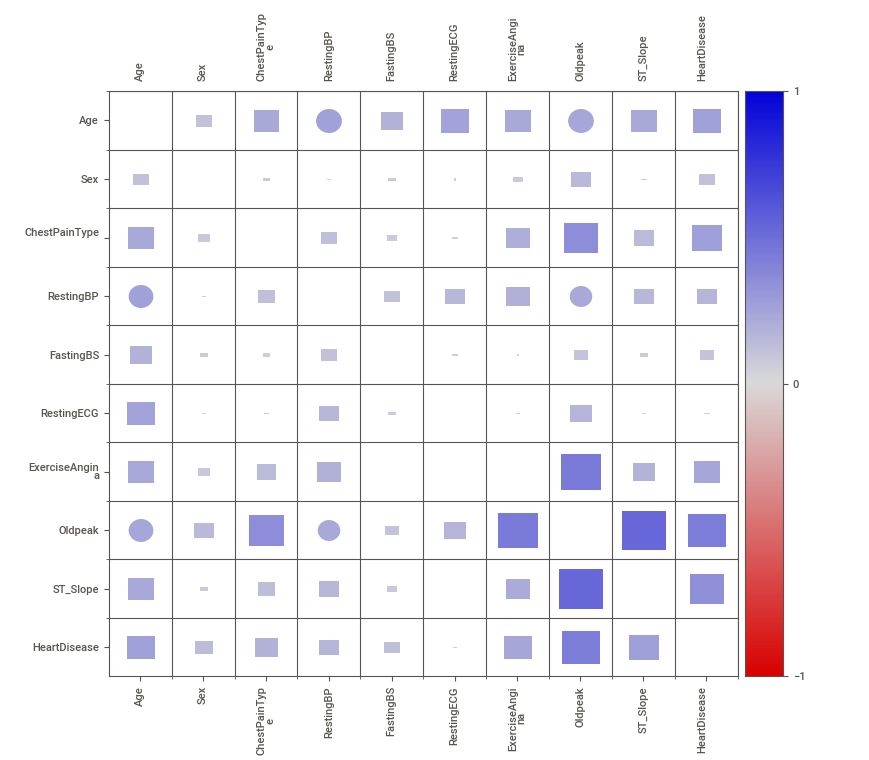
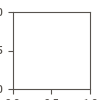

In [ ]:
# Visual Python: Data Analysis > Sweetviz
report = sweetviz.analyze([heart1, 'Laporan Penelaahan Data Heart Disease Dataset'])
report.show_notebook()
report

**6. Mengkonstruksi dan Menentukan  Label Data**

In [ ]:
catVar_heart1 = heart1.select_dtypes(include = ['category'])

In [ ]:
# Kontruksi semua variabel kategorik dengan pelabelan bilangan biner
print(heart1.shape)
for col in catVar_heart1.columns:
    if col != 'HeartDisease':
        transformasi = pd.get_dummies(heart1[col], prefix='')
        heart1 = pd.concat([heart1, transformasi], axis = 1)
        # Hapus Variabel Kategorik Awal, Sudah tidak diperlukan
        try:
            heart1.drop([col], axis=1, inplace=True)
        except Exception as err_:
            print(err_)
print(heart1.shape)
heart1.head()

(900, 10)
(900, 19)


,Age,RestingBP,FastingBS,Oldpeak,HeartDisease,_F,_M,_ASY,_ATA,_NAP,_TA,_LVH,_Normal,_ST,_N,_Y,_Down,_Flat,_Up
1,49.0,160,0,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37.0,130,0,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48.0,138,0,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54.0,150,0,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
5,39.0,120,0,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [ ]:
heart1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 1 to 917
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           900 non-null    float64
 1   RestingBP     900 non-null    int64  
 2   FastingBS     900 non-null    int64  
 3   Oldpeak       900 non-null    float64
 4   HeartDisease  900 non-null    int64  
 5   _F            900 non-null    uint8  
 6   _M            900 non-null    uint8  
 7   _ASY          900 non-null    uint8  
 8   _ATA          900 non-null    uint8  
 9   _NAP          900 non-null    uint8  
 10  _TA           900 non-null    uint8  
 11  _LVH          900 non-null    uint8  
 12  _Normal       900 non-null    uint8  
 13  _ST           900 non-null    uint8  
 14  _N            900 non-null    uint8  
 15  _Y            900 non-null    uint8  
 16  _Down         900 non-null    uint8  
 17  _Flat         900 non-null    uint8  
 18  _Up           900 non-null    

In [ ]:
# Menyimpan data yang telah dipreprocessing untuk analisis lebih lanjut
!mkdir data
heart1.to_csv("data/heart_PreProcessed.csv", encoding='utf8', index=False)

mkdir: cannot create directory ‘data’: File exists


**Analisa PreProcessing Data**

In [ ]:
# Load data yang telah di preprocessing
# Sangat berguna jika ingin menganalisa data di workbook yang berbeda
file_ = 'data/heart_PreProcessed.csv'
heart1 = pd.read_csv(file_)
N, P = heart1.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
heart1.head()

baris =  900 , Kolom (jumlah variabel) =  19


,Age,RestingBP,FastingBS,Oldpeak,HeartDisease,_F,_M,_ASY,_ATA,_NAP,_TA,_LVH,_Normal,_ST,_N,_Y,_Down,_Flat,_Up
0,49.0,160,0,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
1,37.0,130,0,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
2,48.0,138,0,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
3,54.0,150,0,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
4,39.0,120,0,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


**8. Membangun Model**

Dalam hal ini akan dilakukan klasifikasi untuk memprediksi apakah seseorang menderita penyakit jantung (variabel target: HeartDisease) dengan berdasarkan variabel-variabel prediktor, yakni dengan menggunakan model Decission Tree (pendekatan frekuensi) dan Regresi Logistik (pendekatan kovarians/korelasi matriks).

In [ ]:
# Membagi data train dan test menggunakan stratified sampling
# Untuk memastikan persebaran data train dan test merata
predictor = heart1.loc[:, ~heart1.columns.isin(['HeartDisease'])] #memilih variabel prediktor, dengan mengecualikan variabel target
target = heart1['HeartDisease']

xTrain, xTest, yTrain, yTest = train_test_split(predictor, target, test_size=0.2, random_state=33)
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)
# train_test_split fungsi stratified sampling
# karena untuk kebutuhan industri, maka dipakai test_size sebesar 0.7
# random_state berfungsi agar data dapat divalidasi, nilainya bebas dan mempengaruhi akurasi tergantung seberapa jauh perbedaannya

(720, 18) (720,)
(180, 18) (180,)


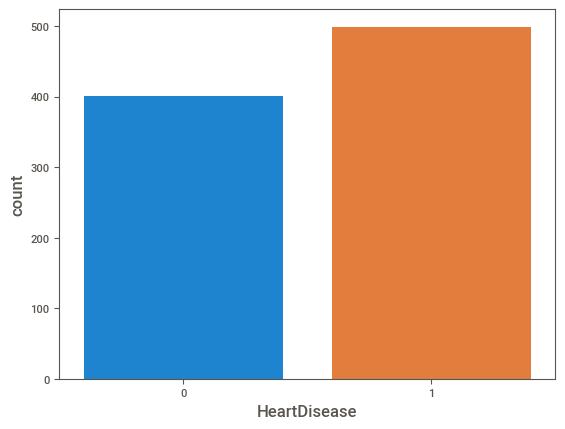

Counter({1: 499, 0: 401})
0 =  44.55555555555556 % 1 =  55.44444444444444 %


In [ ]:
# melihat distribusi variabel target
# Visual Python: Visualization > Seaborn
from collections import Counter

sns.countplot(data=heart1, x='HeartDisease')
plt.show()

D = Counter(heart1['HeartDisease'])
print(D)
print("0 = ", D[0]*100/(len(heart1['HeartDisease'])), '% 1 = ',D[1]*100/(len(heart1['HeartDisease'])),'%')

In [ ]:
# Model Regresi Logistik
reglog = LogisticRegression().fit(xTrain, yTrain)
prediksi_regLog = reglog.predict(xTest)
print(confusion_matrix(yTest, prediksi_regLog))
print(classification_report(yTest, prediksi_regLog))

[[71 12]
 [10 87]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        83
           1       0.88      0.90      0.89        97

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



Dengan melihat output, pada bagian awal didapat confussion matriks, seperti berikut

|                  | Predicted Negative | Predicted Positive |
|------------------|--------------------|--------------------|
| Actual Negative  | True Negative      | False Positive     |
| Actual Positive  | False Negative     | True Positive      |

- dimana, terdapat 71 pasien True Negative, 12 pasien False Positive, 10 pasien False Negative, dan 87 pasien True Positive berdasarkan prediksi model.

- pada nilai recall, kedua kategori memperoleh nilai yang hampir seimbang (0 - pasien normal: 86%, 1 - pasien dengan penyakit jantung: 90%), dengan nilai tersebut menunjukkan bahwa model mampu meprediksi kedua kategori dengan cukup tepat, mempertimbangkan lebih sedikitnya kesalahan prediksi yang terjadi.

- didapat nilai akurasi model sebesar 88% (mencapai batas minimum memprediksi keseluruhan kategori suatu kategori tertinggi pada variabel target (barplot sebelumnya), yakni kategori 1 - pasien dengan penyakit jantung: 55%)

- prediksi ini menggunakan parameter default (belum dioptimalkan).










In [ ]:
# cross validasi
# merata-ratakan seluruh training dan test data untuk dijadikan evaluasi keseluruhan model
mulai = time.time()
scores_regLog = cross_val_score(reglog, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.84 (+/- 0.12), Waktu = 1.233 detik


Didapat akurasi sebesar 84%, dengan variasi 12% (terbilang cukup tinggi)

RegLog    0.711111
dtype: float64

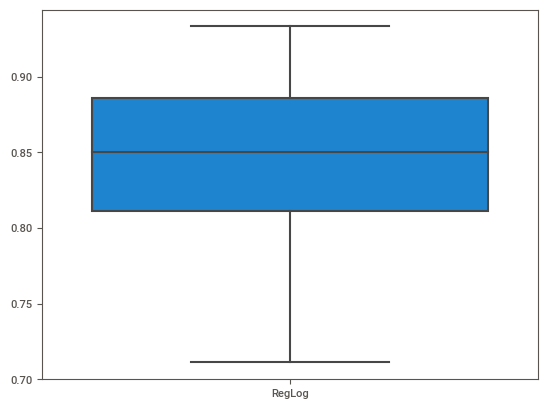

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
HeartX_ = pd.DataFrame({'RegLog': scores_regLog})
p = sns.boxplot(data = HeartX_)
HeartX_.min()

In [ ]:
# Pemodelan menggunakan decission tree
DT = tree.DecisionTreeClassifier()
DT = DT.fit(xTrain, yTrain)
prediksi_DT = DT.predict(xTest)

print(confusion_matrix(yTest, prediksi_DT))
print(classification_report(yTest, prediksi_DT))

[[70 13]
 [24 73]]
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        83
           1       0.85      0.75      0.80        97

    accuracy                           0.79       180
   macro avg       0.80      0.80      0.79       180
weighted avg       0.80      0.79      0.79       180



Dengan melihat output, pada bagian awal didapat confussion matriks, seperti berikut

|                  | Predicted Negative | Predicted Positive |
|------------------|--------------------|--------------------|
| Actual Negative  | True Negative      | False Positive     |
| Actual Positive  | False Negative     | True Positive      |

- dimana, terdapat 70 pasien True Negative, 13 pasien False Positive, 24 pasien False Negative, dan 73 pasien True Positive berdasarkan prediksi model.

- pada nilai recall, didapat nilai dari kategori 0 - pasien normal: 79% dan kategori 1 - pasien dengan penyakit jantung: 80%, dengan nilai tersebut menunjukkan bahwa model mampu meprediksi kedua kategori dengan cukup tepat, mempertimbangkan lebih sedikitnya kesalahan prediksi yang terjadi.

- didapat nilai akurasi model sebesar 79% (mencapai batas minimum memprediksi keseluruhan kategori suatu kategori tertinggi pada variabel target (barplot sebelumnya), yakni kategori 1 - pasien dengan penyakit jantung: 55%)

- prediksi ini menggunakan parameter default (belum dioptimalkan).


In [ ]:
# Varible importance - Salah satu kelebihan Decision Tree
DT.feature_importances_

array([0.09614229, 0.10142542, 0.02703134, 0.11557288, 0.02525139,
       0.00797897, 0.094903  , 0.00225289, 0.00391126, 0.00937119,
       0.02265137, 0.00425545, 0.0456171 , 0.008615  , 0.02110659,
       0.00750962, 0.00925293, 0.39715129])

In [ ]:
# Mengurutkan nilai variabel importance tiap variabel
importance = DT.feature_importances_
feature_names = ['Age',	'RestingBP',	'FastingBS',	'Oldpeak',
                 '_F', '_M',	'_ASY',	'_ATA',	'_NAP',	'_TA',	'_LVH',	'_Normal',
                 '_ST',	'_N',	'_Y',	'_Down',	'_Flat', '_Up']

if len(importance) != len(feature_names):
    print("Jumlah feature importance tidak sesuai dengan jumlah nama variabel")
else:
    # Mengambil indeks yang telah diurutkan dari yang paling penting ke yang paling rendah
    sorted_indices = importance.argsort()[::-1]

    # Mengurutkan nilai-nilai feature importance
    sorted_importance = importance[sorted_indices]

    # Menampilkan nilai importance beserta nama variabelnya
    for idx, imp in zip(sorted_indices, sorted_importance):
        print(f"Variabel '{feature_names[idx]}' memiliki nilai importance: {imp}")

Variabel '_Up' memiliki nilai importance: 0.3971512943769779
Variabel 'Oldpeak' memiliki nilai importance: 0.1155728768729795
Variabel 'RestingBP' memiliki nilai importance: 0.1014254184251708
Variabel 'Age' memiliki nilai importance: 0.0961422941525705
Variabel '_ASY' memiliki nilai importance: 0.09490300496862125
Variabel '_ST' memiliki nilai importance: 0.045617104136767166
Variabel 'FastingBS' memiliki nilai importance: 0.02703134443637489
Variabel '_F' memiliki nilai importance: 0.02525139346948368
Variabel '_LVH' memiliki nilai importance: 0.02265136654487235
Variabel '_Y' memiliki nilai importance: 0.021106589340148463
Variabel '_TA' memiliki nilai importance: 0.009371187976033495
Variabel '_Flat' memiliki nilai importance: 0.009252926740958279
Variabel '_N' memiliki nilai importance: 0.008615003684358535
Variabel '_M' memiliki nilai importance: 0.00797897305923214
Variabel '_Down' memiliki nilai importance: 0.007509621702806722
Variabel '_Normal' memiliki nilai importance: 0.00

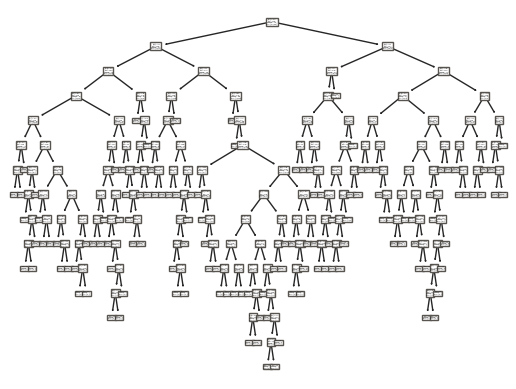

In [ ]:
# Plot Decission Tree
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(xTrain, yTrain)
p = tree.plot_tree(clf)

In [ ]:
# cross validasi
# merata-ratakan seluruh training dan test data untuk dijadikan evaluasi keseluruhan model
mulai = time.time()
scores_dt = cross_val_score(DT, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Decision Tree: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_dt.mean(), scores_dt.std() * 2, waktu))

Accuracy Decision Tree: 0.80 (+/- 0.12), Waktu = 0.312 detik


Didapat akurasi sebesar 80%, dengan variasi 12% (terbilang cukup tinggi)



DecTree    0.666667
dtype: float64

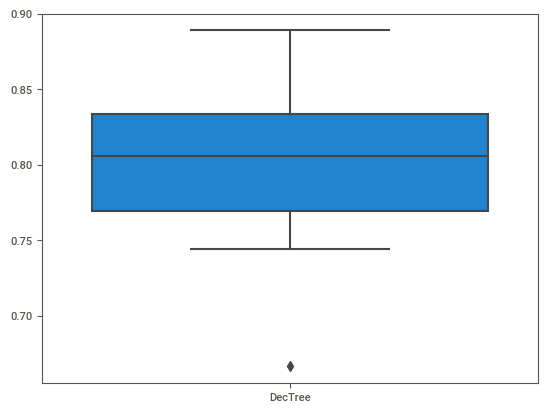

In [ ]:
HeartX_ = pd.DataFrame({"DecTree":scores_dt})
p = sns.boxplot(data = HeartX_)
HeartX_.min()

RegLog     0.711111
DecTree    0.666667
dtype: float64

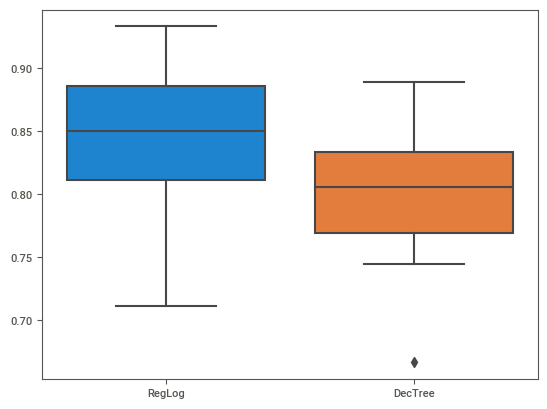

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
HeartX_ = pd.DataFrame({'RegLog': scores_regLog, "DecTree":scores_dt})
p = sns.boxplot(data = HeartX_)
HeartX_.min()

Berdasarkan output, dapat diliat akurasi model prediksi regresi logistik lebih baik daripada model decission tree (parameter default)

**9. Mengevaluasi Hasil Pemodelan**

In [ ]:
# Optimasi Parameter untuk mendapatkan model yang lebih optimal
from sklearn.pipeline import make_pipeline
from sklearn import linear_model #import LogisticRegression

pipeSVM = make_pipeline(linear_model.LogisticRegression())
print(sorted(pipeSVM.get_params().keys()))

['logisticregression', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start', 'memory', 'steps', 'verbose']


In [ ]:
# Optimasi parameter pada model regresi logistik
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]},
             {'class_weight':[None, 'balanced']}]

grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_search.fit(xTrain, yTrain)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 17 candidates, totalling 85 fits
0.85
{'solver': 'lbfgs'}


In [ ]:
pipeDT = make_pipeline(tree.DecisionTreeClassifier())
print(sorted(pipeDT.get_params().keys()))

['decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter', 'memory', 'steps', 'verbose']


In [ ]:
# Optimasi parameter pada decisission tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dtree_model=DecisionTreeClassifier()
dtree_gscv = RandomizedSearchCV(dtree_model, param_grid, cv=10)
dtree_gscv.fit(xTrain, yTrain)

print(dtree_gscv.best_score_)
print(dtree_gscv.best_params_)

0.8277777777777777
{'max_depth': 4, 'criterion': 'entropy'}


Accuracy RL: 0.84 (+/- 0.10)
Accuracy DT: 0.83 (+/- 0.11)


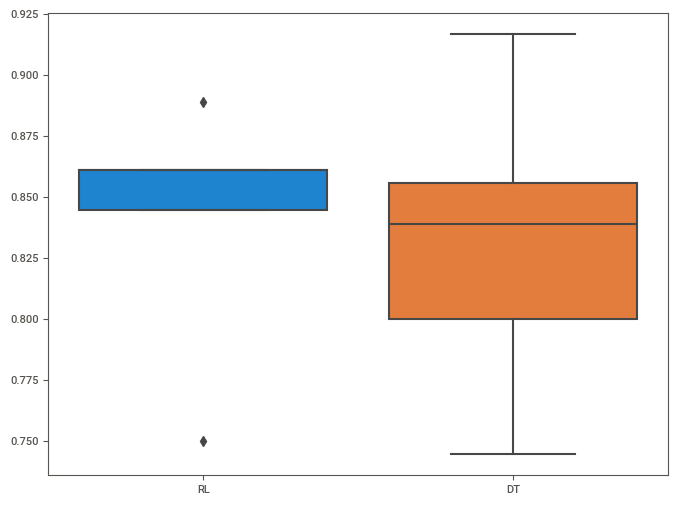

In [ ]:
kCV = 5
# Menggunakan parameter optimal
RL_opt = LogisticRegression(C= 0.1)
DT_opt = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Melakukan Cross Validasi
models = ['RL', 'DT']
RL_score = cross_val_score(RL_opt, predictor, target, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
DT_score = cross_val_score(DT_opt, predictor, target, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
scores = [RL_score, DT_score]

data = {m:s for m,s in zip(models, scores)}
for name in data.keys():
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (name, data[name].mean(), data[name].std() * 2))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
p = sns.boxplot(data=pd.DataFrame(data), ax=ax)

Berdasarkan output, dapat diliat akurasi model prediksi regresi logistik lebih baik daripada model decission tree (parameter optimasi)

Rekomendasi:

- perlu dilakukan follow up lebih lanjut terhadap outlier pada data, karena model regresi logistik tidak robas terhadap outlier, dan jika diperlukan analisis terpisah outlier outlier tersebut.

- Dengan melihat output pada variabel importance, dapat dilihat persentase persentase pengaruh variabel prediktor terhadap variabel objek (HeartDisease)

- Berdasarkan analisis yang didapat saat ini, model prediksi regresi logistik lebih baik digunakan dengan akurasi: 0.84 (+/- 0.10), angka ini tentunya lebih besar daripada akurasi yang dimiliki oleh model prediksi decission tree.